In [370]:
from bs4 import BeautifulSoup
import requests
import time, os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from random_user_agent.user_agent import UserAgent
from random_user_agent.params import SoftwareName, OperatingSystem
import re
import random
import string
from datetime import datetime
from progressbar import ProgressBar
import pandas as pd
pbar = ProgressBar()
%config InlineBackend.figure_formats = ['retina']
import collections
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV


import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Gather Data

In [2]:
# you can also import SoftwareEngine, HardwareType, SoftwareType, Popularity from random_user_agent.params
# you can also set number of user agents required by providing `limit` as parameter

software_names = [SoftwareName.CHROME.value]

operating_systems = [OperatingSystem.WINDOWS.value, OperatingSystem.LINUX.value]   

user_agent_rotator = UserAgent(software_names=software_names, operating_systems=operating_systems, limit=100)

# Get list of user agents.
user_agents = user_agent_rotator.get_user_agents()

user_agent = user_agent_rotator.get_random_user_agent()

In [3]:
# Get Random User Agent String.
def new_agent():
    return user_agent_rotator.get_random_user_agent()



In [4]:
chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver
cars_all = "https://www.cars.com/"
#user_agent = {'User-agent': user_agent}
driver = webdriver.Chrome(chromedriver)
driver.get(cars_all)
time.sleep(1)

In [5]:
user_agent = new_agent()

In [6]:
go_adv_search_button = driver.find_element_by_xpath(
    '//a[contains(@href, "/for-sale/advanced-search/")]')
go_adv_search_button.click()
time.sleep(5)

all_miles = Select(driver.find_element_by_xpath(
    '//select[contains(@class, "as-radii-drop-down")]'))
all_miles.select_by_visible_text('All Miles')
time.sleep(1)

my_zip = driver.find_element_by_xpath(
    '//input[contains(@name, "zipField")]')
#input new search
my_zip.send_keys("11201")

time.sleep(2)

all_radio = driver.find_element_by_xpath(
    '//li[contains(@class, "as-button-bar-all")]')
all_radio.click()
time.sleep(2)

home_delivery_click = driver.find_element_by_xpath(
    '//input[contains(@id, "as-home-delivery")]')
home_delivery_click.click()
time.sleep(2)

make1 = Select(driver.find_element_by_xpath(
    '//select[contains(@name, "make")]'))
make1.select_by_visible_text('Mazda')
time.sleep(1)

model1 = Select(driver.find_element_by_xpath(
    '//select[contains(@name, "model")]'))
model1.select_by_visible_text('MX-5 Miata')
time.sleep(1)

add_another1 = driver.find_element_by_xpath(
    '//a[contains(@class, "as-another-car-anchor")]')
add_another1.click()
time.sleep(1)

make2 = Select(driver.find_element_by_xpath(
    '//select[contains(@class, "as-make-drop-down ng-pristine ng-untouched ng-valid ng-empty")]'))
make2.select_by_visible_text('Mazda')
time.sleep(1)

model2 = Select(driver.find_element_by_xpath(
    '//select[contains(@class, "as-model-drop-down ng-pristine ng-untouched ng-valid ng-empty")]'))
model2.select_by_visible_text('MX-5 Miata RF')
time.sleep(1)

add_another2 = driver.find_element_by_xpath(
    '//a[contains(@class, "as-another-car-anchor")]')
add_another2.click()
time.sleep(1)

make3 = Select(driver.find_element_by_xpath(
    '//select[contains(@class, "as-make-drop-down ng-pristine ng-untouched ng-valid ng-empty")]'))
make3.select_by_visible_text('Mazda')
time.sleep(1)

model3 = Select(driver.find_element_by_xpath(
    '//select[contains(@class, "as-model-drop-down ng-pristine ng-untouched ng-valid ng-empty")]'))
model3.select_by_visible_text('MazdaSpeed Miata MX-5')
time.sleep(1)

submit = driver.find_element_by_xpath(
    '//input[contains(@class, "cui-button as-submit-button")]')
submit.click()
time.sleep(3)

set_page_limit = Select(driver.find_element_by_xpath(
    '//select[contains(@aria-label, "Results Per Page")]'))
set_page_limit.select_by_visible_text('100 Per Page')
time.sleep(5)


In [7]:
url = driver.current_url
user_agent=new_agent()
page = requests.get(url, user_agent).text
soup = BeautifulSoup(page, 'html5lib')
max_page = soup.findAll('a', {'class':'not-current'})[-1].text
max_page=int(max_page)+1

In [8]:
car_listing=[]
for pages in range(1,max_page):
#for pages in range(1,2):
    url = driver.current_url
    user_agent=new_agent()
    page = requests.get(url, user_agent).text
    soup = BeautifulSoup(page, 'html5lib')
    car_links = soup.findAll('div', {'class':'shop-srp-listings__listing-container'})
    print('THIS_IS_PAGE: '+str(pages))
    for div in car_links:
        links = div.findAll('a')
        for a in links:
            car_listing.append("https://www.cars.com/" + a['href'])
    element = driver.find_element_by_xpath('//a[contains(@class, "button next-page")]')
    driver.execute_script("arguments[0].click();", element)
    time.sleep(1+5*random.random())


THIS_IS_PAGE: 1
THIS_IS_PAGE: 2
THIS_IS_PAGE: 3
THIS_IS_PAGE: 4
THIS_IS_PAGE: 5
THIS_IS_PAGE: 6
THIS_IS_PAGE: 7
THIS_IS_PAGE: 8
THIS_IS_PAGE: 9
THIS_IS_PAGE: 10
THIS_IS_PAGE: 11
THIS_IS_PAGE: 12
THIS_IS_PAGE: 13
THIS_IS_PAGE: 14
THIS_IS_PAGE: 15
THIS_IS_PAGE: 16
THIS_IS_PAGE: 17
THIS_IS_PAGE: 18
THIS_IS_PAGE: 19
THIS_IS_PAGE: 20
THIS_IS_PAGE: 21
THIS_IS_PAGE: 22
THIS_IS_PAGE: 23
THIS_IS_PAGE: 24
THIS_IS_PAGE: 25


In [9]:
car_data = []
headers = ['link','vin','stock_type','year_model','year','model','msrp','price','overall_rating','comf_rating','perf_rating','ext_rating','int_rating',
           'value_rating','reliability_rating','indv_dealer','dealer_rev_count','dealer_rev_rating','location','fuel_type',
           'ext_color','int_color','stock','drivetrain','transmission','engine','mileage','city_mpg','highway_mpg', 'convenience_feats',
           'entertainment_feats','safety_feats','seating_feats','exterior_feats']

In [ ]:
#counter=collections.Counter(car_listing)
#counter.most_common(200)

In [10]:
for car_dets in pbar(car_listing):
    
    try:
    
        #NEW PAGE
        user_agent=new_agent()
        page = requests.get(car_dets, user_agent).text
        soup = BeautifulSoup(page, 'html5lib')

        #COLLECT VARIABLES
        #stock_type new or used
        if soup.find(class_ = 'vehicle-info__stock-type'):
            stock_type = soup.find(class_ = 'vehicle-info__stock-type').text
        else: 
            stock_type = None
        #vin
        if soup.find(text='VIN:'):
            vin = soup.find(text='VIN:').findNext().text
        elif soup.find('p', text = re.compile(r"JM1N[A-Za-z0-9]{13}")):
            vin = re.search(r"JM1N[A-Za-z0-9]{13}", soup.find('p', text = re.compile(r"JM1N[A-Za-z0-9]{13}")).text).group(0)
        else: 
            vin = None
            
        #year and model
        if soup.find(class_ = 'cui-heading-2--secondary vehicle-info__title'):
            year_model = soup.find(class_ = 'cui-heading-2--secondary vehicle-info__title').text
        else: 
            year_model = None
        #year
        year = re.search(r"(20|19)\d{2}",year_model).group()
        #model
        model = re.search(r"Mazda(.*)",year_model).group(1)
        #MSRP
        if soup.find(class_ = 'vehicle-info__price-label vehicle-info__price-label--msrp-badge'):
            msrp = (soup.find(class_ = 'vehicle-info__price-label vehicle-info__price-label--msrp-badge').findNext().text).translate(str.maketrans('', '', string.punctuation))
        elif soup.find(class_ = 'vehicle-info__price-display'):
            msrp = (soup.find(class_ = 'vehicle-info__price-display').text).translate(str.maketrans('', '', string.punctuation))
        else:
            msrp = None
        #price
        if soup.find(class_ = 'vehicle-info__price-display vehicle-info__price-display--dealer cui-heading-2'):
            price = (soup.find(class_ = 'vehicle-info__price-display vehicle-info__price-display--dealer cui-heading-2').text).translate(str.maketrans('', '', string.punctuation))
        else:
            price = None
        #overall Rating
        overall_rating = soup.find(class_ = 'overall-review-stars').findNext().findNext().text
        #comfort Rating
        comf_rating = soup.find("p",text="Comfort").findNext().findNext().text
        #Performance Rating
        perf_rating = soup.find("p",text="Performance").findNext().findNext().text
        #Exterior Styling Rating
        if soup.find("p",text="Exterior Styling"):
            ext_rating = soup.find("p",text="Exterior Styling").findNext().findNext().text
        else:
            ext_rating = None
        #Interior Design Rating
        if soup.find("p",text="Interior Design"):
            int_rating = soup.find("p",text="Interior Design").findNext().findNext().text
        else:
            int_rating = None
        #Value for the Money Rating
        value_rating = soup.find("p",text="Value for the Money").findNext().findNext().text
        #Reliability Rating
        reliability_rating = soup.find("p",text="Reliability").findNext().findNext().text
        #Dealership or Private
        if soup.find(class_="page-section__title page-section__title--dealer-name cui-heading-6"):
            indv_dealer='Dealer'
        else:
            indv_dealer='Individual'
        #Dealership Review Count
        if soup.find(class_="rating__link--has-reviews-count"):
            dealer_rev_count = re.search(r"^[0-9]+",soup.find(class_="rating__link--has-reviews-count").text).group()
        else:
            dealer_rev_count = None
        #Dealership Review Rating
        if soup.find(class_="rating__link rating__link--has-reviews"):
            dealer_rev_rating = re.search(r"(\()([0-9.]+)(\))",soup.find(class_="rating__link rating__link--has-reviews").text).group(2)
        else:
            dealer_rev_rating = None
        #Location of Dealership
        if soup.find(class_="get-directions-link__link"):
            location = re.search(r"[0-9]{5}",soup.find(class_="get-directions-link__link").text).group(0)
        else: 
            location = None
        #Fuel Type
        fuel_type = soup.find(text='Fuel Type:').findNext().text
        #Exterior Color
        if soup.find(text='Exterior Color:'):
            ext_color = soup.find(text='Exterior Color:').findNext().text
        else:
            ext_color = None
        #Interior Color
        if soup.find(text='Interior Color:'):
            int_color = soup.find(text='Interior Color:').findNext().text
        else: 
            int_color = None
        #Stock
        if soup.find(text='Stock:'):
            stock = soup.find(text='Stock:').findNext().text
        else:
            stock = None
        #Drivetrain
        if soup.find(text='Drivetrain:'):
            drivetrain = soup.find(text='Drivetrain:').findNext().text
        else: 
            drivetrain = None
        #Transmission
        if soup.find(text='Transmission:'):
            transmission = soup.find(text='Transmission:').findNext().text
        else:
            transmission = None
        #Engine
        if soup.find(text='Engine:'):
            engine = soup.find(text='Engine:').findNext().text
        else:
            engine = None
        #Mileage
        if soup.find(text='Mileage:'):
            mileage = soup.find(text='Mileage:').findNext().text
        else: 
            mileage = None
        #City MPG
        if soup.find(text='City MPG:'):
            city_mpg = soup.find(text='City MPG:').findNext().text
        else: 
            city_mpg = None
        #Highway MPG
        if soup.find(text='Highway MPG:'):
            highway_mpg = soup.find(text='Highway MPG:').findNext().text
        else:
            highway_mpg = None
        #Convenience
        if soup.find(class_='page-section__title--sub cui-heading-2', text='Convenience'):
            convenience_feats = soup.find(class_='page-section__title--sub cui-heading-2', text='Convenience').findNext().text
        else:
            convenience_feats = None
        #Entertainment
        if soup.find(class_='page-section__title--sub cui-heading-2', text='Entertainment'):
            entertainment_feats = soup.find(class_='page-section__title--sub cui-heading-2', text='Entertainment').findNext().text
        else:
            entertainment_feats = None
        #Safety
        if soup.find(class_='page-section__title--sub cui-heading-2', text='Safety'):
            safety_feats = soup.find(class_='page-section__title--sub cui-heading-2', text='Safety').findNext().text
        else:
            safety_feats = None
        #Seating
        if soup.find(class_='page-section__title--sub cui-heading-2', text='Seating'):
            seating_feats = soup.find(class_='page-section__title--sub cui-heading-2', text='Seating').findNext().text
        else:
            seating_feats = None
        #Exterior
        if soup.find(class_='page-section__title--sub cui-heading-2', text='Exterior'):
            exterior_feats = soup.find(class_='page-section__title--sub cui-heading-2', text='Exterior').findNext().text
        else:
            exterior_feats = None

        #APPEND TO DICT
        car_dict = dict(zip(headers, [  
                                    car_dets,
                                    vin,
                                    stock_type,
                                    year_model,
                                    year,
                                    model,
                                    msrp,
                                    price, 
                                    overall_rating,
                                    comf_rating,
                                    perf_rating,
                                    ext_rating,
                                    int_rating,
                                    value_rating,
                                    reliability_rating,
                                    indv_dealer,
                                    dealer_rev_count,
                                    dealer_rev_rating,
                                    location,
                                    fuel_type,
                                    ext_color,
                                    int_color,
                                    stock,
                                    drivetrain,
                                    transmission,
                                    engine,
                                    mileage,
                                    city_mpg,
                                    highway_mpg,
                                    convenience_feats,
                                    entertainment_feats,
                                    safety_feats,
                                    seating_feats,
                                    exterior_feats
                                 ]))

        car_data.append(car_dict)

        #GO TO SLEEP
        time.sleep(.5*random.random())

        print(datetime.now(),car_dets)
    
    except StopIteration:
        raise
    except Exception as e:
        print(e) # or whatever kind of logging you want
        pass
    

2020-01-21 17:48:44.030231 https://www.cars.com//vehicledetail/detail/790441447/overview/
2020-01-21 17:48:44.677575 https://www.cars.com//vehicledetail/detail/770861363/overview/
2020-01-21 17:48:45.362413 https://www.cars.com//vehicledetail/detail/788347956/overview/
2020-01-21 17:48:46.078500 https://www.cars.com//vehicledetail/detail/784121059/overview/
2020-01-21 17:48:47.014062 https://www.cars.com//vehicledetail/detail/767132829/overview/
2020-01-21 17:48:47.405782 https://www.cars.com//vehicledetail/detail/795447374/overview/
2020-01-21 17:48:47.882218 https://www.cars.com//vehicledetail/detail/780680672/overview/
2020-01-21 17:48:48.580737 https://www.cars.com//vehicledetail/detail/786965826/overview/
2020-01-21 17:48:49.358065 https://www.cars.com//vehicledetail/detail/791475368/overview/
2020-01-21 17:48:49.822716 https://www.cars.com//vehicledetail/detail/786523777/overview/
2020-01-21 17:48:50.563609 https://www.cars.com//vehicledetail/detail/785491086/overview/
2020-01-21

2020-01-21 17:49:00.357862 https://www.cars.com//vehicledetail/detail/790699960/overview/
2020-01-21 17:49:00.864705 https://www.cars.com//vehicledetail/detail/760627590/overview/
2020-01-21 17:49:01.703999 https://www.cars.com//vehicledetail/detail/787185041/overview/
2020-01-21 17:49:02.269213 https://www.cars.com//vehicledetail/detail/775547082/overview/
2020-01-21 17:49:02.904806 https://www.cars.com//vehicledetail/detail/779197556/overview/
2020-01-21 17:49:03.339459 https://www.cars.com//vehicledetail/detail/790252422/overview/
2020-01-21 17:49:03.924654 https://www.cars.com//vehicledetail/detail/763842082/overview/
2020-01-21 17:49:04.714937 https://www.cars.com//vehicledetail/detail/792320587/overview/
2020-01-21 17:49:05.405321 https://www.cars.com//vehicledetail/detail/789071101/overview/
2020-01-21 17:49:06.020160 https://www.cars.com//vehicledetail/detail/772133735/overview/
2020-01-21 17:49:06.685231 https://www.cars.com//vehicledetail/detail/776649759/overview/
2020-01-21

2020-01-21 17:49:17.489270 https://www.cars.com//vehicledetail/detail/796512937/overview/
2020-01-21 17:49:18.216240 https://www.cars.com//vehicledetail/detail/773264270/overview/
2020-01-21 17:49:19.037513 https://www.cars.com//vehicledetail/detail/796153714/overview/
2020-01-21 17:49:19.578325 https://www.cars.com//vehicledetail/detail/752780656/overview/
2020-01-21 17:49:20.270612 https://www.cars.com//vehicledetail/detail/788599685/overview/
2020-01-21 17:49:20.995254 https://www.cars.com//vehicledetail/detail/789794325/overview/
2020-01-21 17:49:21.794442 https://www.cars.com//vehicledetail/detail/778038507/overview/
2020-01-21 17:49:22.552438 https://www.cars.com//vehicledetail/detail/781018812/overview/
2020-01-21 17:49:23.373266 https://www.cars.com//vehicledetail/detail/793410330/overview/
2020-01-21 17:49:24.328100 https://www.cars.com//vehicledetail/detail/775880124/overview/
2020-01-21 17:49:24.820389 https://www.cars.com//vehicledetail/detail/779676767/overview/
2020-01-21

2020-01-21 17:49:35.677994 https://www.cars.com//vehicledetail/detail/796797445/overview/
2020-01-21 17:49:36.195928 https://www.cars.com//vehicledetail/detail/788125557/overview/
2020-01-21 17:49:36.838541 https://www.cars.com//vehicledetail/detail/794329477/overview/
2020-01-21 17:49:37.562745 https://www.cars.com//vehicledetail/detail/788317519/overview/
2020-01-21 17:49:38.407337 https://www.cars.com//vehicledetail/detail/796701588/overview/
2020-01-21 17:49:39.274718 https://www.cars.com//vehicledetail/detail/795680035/overview/
2020-01-21 17:49:39.904588 https://www.cars.com//vehicledetail/detail/761407045/overview/
2020-01-21 17:49:40.615435 https://www.cars.com//vehicledetail/detail/772814484/overview/
2020-01-21 17:49:41.080065 https://www.cars.com//vehicledetail/detail/795166734/overview/
2020-01-21 17:49:41.957261 https://www.cars.com//vehicledetail/detail/795166164/overview/
2020-01-21 17:49:42.471814 https://www.cars.com//vehicledetail/detail/795166269/overview/
2020-01-21

2020-01-21 17:49:53.719590 https://www.cars.com//vehicledetail/detail/792560779/overview/
2020-01-21 17:49:54.237111 https://www.cars.com//vehicledetail/detail/790858610/overview/
2020-01-21 17:49:54.776046 https://www.cars.com//vehicledetail/detail/793969653/overview/
2020-01-21 17:49:55.325514 https://www.cars.com//vehicledetail/detail/793227223/overview/
2020-01-21 17:49:56.173560 https://www.cars.com//vehicledetail/detail/788735831/overview/
2020-01-21 17:49:57.022427 https://www.cars.com//vehicledetail/detail/794705107/overview/
2020-01-21 17:49:57.901336 https://www.cars.com//vehicledetail/detail/795719794/overview/
2020-01-21 17:49:58.713173 https://www.cars.com//vehicledetail/detail/788962679/overview/
2020-01-21 17:49:59.257252 https://www.cars.com//vehicledetail/detail/785043196/overview/
2020-01-21 17:49:59.746695 https://www.cars.com//vehicledetail/detail/794212054/overview/
2020-01-21 17:50:00.397842 https://www.cars.com//vehicledetail/detail/764143566/overview/
2020-01-21

2020-01-21 17:50:10.967695 https://www.cars.com//vehicledetail/detail/763235482/overview/
2020-01-21 17:50:11.730140 https://www.cars.com//vehicledetail/detail/794680538/overview/
2020-01-21 17:50:12.692990 https://www.cars.com//vehicledetail/detail/770444702/overview/
2020-01-21 17:50:13.414971 https://www.cars.com//vehicledetail/detail/780709520/overview/
2020-01-21 17:50:14.273662 https://www.cars.com//vehicledetail/detail/767146079/overview/
2020-01-21 17:50:15.367474 https://www.cars.com//vehicledetail/detail/792587750/overview/
2020-01-21 17:50:15.820935 https://www.cars.com//vehicledetail/detail/771842578/overview/
2020-01-21 17:50:16.343654 https://www.cars.com//vehicledetail/detail/790419325/overview/
2020-01-21 17:50:16.820945 https://www.cars.com//vehicledetail/detail/796170054/overview/
2020-01-21 17:50:17.319538 https://www.cars.com//vehicledetail/detail/788757739/overview/
2020-01-21 17:50:18.210958 https://www.cars.com//vehicledetail/detail/774715404/overview/
2020-01-21

2020-01-21 17:50:29.522647 https://www.cars.com//vehicledetail/detail/791998461/overview/
2020-01-21 17:50:30.444832 https://www.cars.com//vehicledetail/detail/787758602/overview/
2020-01-21 17:50:31.410670 https://www.cars.com//vehicledetail/detail/795249833/overview/
2020-01-21 17:50:32.289464 https://www.cars.com//vehicledetail/detail/770392672/overview/
2020-01-21 17:50:33.081083 https://www.cars.com//vehicledetail/detail/788978636/overview/
2020-01-21 17:50:33.906733 https://www.cars.com//vehicledetail/detail/792888393/overview/
2020-01-21 17:50:34.764687 https://www.cars.com//vehicledetail/detail/796398768/overview/
2020-01-21 17:50:35.774531 https://www.cars.com//vehicledetail/detail/750709905/overview/
2020-01-21 17:50:36.616504 https://www.cars.com//vehicledetail/detail/795712603/overview/
2020-01-21 17:50:37.551848 https://www.cars.com//vehicledetail/detail/764467476/overview/
2020-01-21 17:50:38.242941 https://www.cars.com//vehicledetail/detail/794971483/overview/
2020-01-21

2020-01-21 17:50:49.049206 https://www.cars.com//vehicledetail/detail/777560894/overview/
2020-01-21 17:50:49.629246 https://www.cars.com//vehicledetail/detail/792540451/overview/
2020-01-21 17:50:50.362352 https://www.cars.com//vehicledetail/detail/776971328/overview/
2020-01-21 17:50:50.997154 https://www.cars.com//vehicledetail/detail/796427699/overview/?isShippableInsideSearchRadius
2020-01-21 17:50:51.768745 https://www.cars.com//vehicledetail/detail/792061489/overview/
2020-01-21 17:50:52.589634 https://www.cars.com//vehicledetail/detail/795166230/overview/
2020-01-21 17:50:53.310482 https://www.cars.com//vehicledetail/detail/795166920/overview/
2020-01-21 17:50:54.059425 https://www.cars.com//vehicledetail/detail/795166061/overview/
2020-01-21 17:50:54.956865 https://www.cars.com//vehicledetail/detail/795166607/overview/
2020-01-21 17:50:55.651659 https://www.cars.com//vehicledetail/detail/794678618/overview/
2020-01-21 17:50:56.335542 https://www.cars.com//vehicledetail/detail/

2020-01-21 17:51:08.573187 https://www.cars.com//vehicledetail/detail/794644599/overview/
2020-01-21 17:51:09.182551 https://www.cars.com//vehicledetail/detail/769196616/overview/
2020-01-21 17:51:09.739053 https://www.cars.com//vehicledetail/detail/795443902/overview/
2020-01-21 17:51:10.673670 https://www.cars.com//vehicledetail/detail/787280530/overview/
2020-01-21 17:51:11.222936 https://www.cars.com//vehicledetail/detail/784982308/overview/
2020-01-21 17:51:11.738296 https://www.cars.com//vehicledetail/detail/792241035/overview/
2020-01-21 17:51:12.498049 https://www.cars.com//vehicledetail/detail/795054912/overview/
2020-01-21 17:51:13.137886 https://www.cars.com//vehicledetail/detail/796428328/overview/?isShippableInsideSearchRadius
2020-01-21 17:51:13.737697 https://www.cars.com//vehicledetail/detail/795308340/overview/
2020-01-21 17:51:14.204551 https://www.cars.com//vehicledetail/detail/787035131/overview/
2020-01-21 17:51:14.706244 https://www.cars.com//vehicledetail/detail/

2020-01-21 17:51:25.846243 https://www.cars.com//vehicledetail/detail/787506689/overview/
2020-01-21 17:51:26.508220 https://www.cars.com//vehicledetail/detail/779923518/overview/
2020-01-21 17:51:27.189500 https://www.cars.com//vehicledetail/detail/780559034/overview/
2020-01-21 17:51:27.745779 https://www.cars.com//vehicledetail/detail/786542484/overview/
2020-01-21 17:51:28.263527 https://www.cars.com//vehicledetail/detail/793124414/overview/
2020-01-21 17:51:29.097770 https://www.cars.com//vehicledetail/detail/793600006/overview/
2020-01-21 17:51:29.898174 https://www.cars.com//vehicledetail/detail/767927783/overview/
2020-01-21 17:51:30.637059 https://www.cars.com//vehicledetail/detail/774790463/overview/
2020-01-21 17:51:31.511419 https://www.cars.com//vehicledetail/detail/793225834/overview/
2020-01-21 17:51:32.672496 https://www.cars.com//vehicledetail/detail/790902142/overview/
2020-01-21 17:51:33.645753 https://www.cars.com//vehicledetail/detail/796422632/overview/?isShippabl

2020-01-21 17:51:44.465375 https://www.cars.com//vehicledetail/detail/793878067/overview/
2020-01-21 17:51:45.441516 https://www.cars.com//vehicledetail/detail/787535377/overview/
2020-01-21 17:51:46.092645 https://www.cars.com//vehicledetail/detail/793905730/overview/
2020-01-21 17:51:46.582967 https://www.cars.com//vehicledetail/detail/789649594/overview/
2020-01-21 17:51:47.413175 https://www.cars.com//vehicledetail/detail/789533553/overview/
2020-01-21 17:51:48.145526 https://www.cars.com//vehicledetail/detail/734820748/overview/
2020-01-21 17:51:48.604948 https://www.cars.com//vehicledetail/detail/782369650/overview/
2020-01-21 17:51:49.489859 https://www.cars.com//vehicledetail/detail/795859768/overview/
2020-01-21 17:51:50.299951 https://www.cars.com//vehicledetail/detail/771806750/overview/
2020-01-21 17:51:51.312055 https://www.cars.com//vehicledetail/detail/781741201/overview/
2020-01-21 17:51:51.852991 https://www.cars.com//vehicledetail/detail/781018811/overview/
2020-01-21

2020-01-21 17:52:02.983157 https://www.cars.com//vehicledetail/detail/756715715/overview/
2020-01-21 17:52:03.903719 https://www.cars.com//vehicledetail/detail/784670793/overview/
2020-01-21 17:52:04.903128 https://www.cars.com//vehicledetail/detail/773505680/overview/
2020-01-21 17:52:05.543715 https://www.cars.com//vehicledetail/detail/761781250/overview/
2020-01-21 17:52:06.132483 https://www.cars.com//vehicledetail/detail/749984943/overview/
2020-01-21 17:52:06.652241 https://www.cars.com//vehicledetail/detail/795166396/overview/
2020-01-21 17:52:07.385819 https://www.cars.com//vehicledetail/detail/795166618/overview/
2020-01-21 17:52:07.975053 https://www.cars.com//vehicledetail/detail/795166838/overview/
2020-01-21 17:52:08.797805 https://www.cars.com//vehicledetail/detail/795166151/overview/
2020-01-21 17:52:09.285287 https://www.cars.com//vehicledetail/detail/792249346/overview/
2020-01-21 17:52:10.017447 https://www.cars.com//vehicledetail/detail/770330792/overview/
2020-01-21

2020-01-21 17:52:21.444402 https://www.cars.com//vehicledetail/detail/779228275/overview/
2020-01-21 17:52:22.001848 https://www.cars.com//vehicledetail/detail/787058400/overview/
2020-01-21 17:52:22.528711 https://www.cars.com//vehicledetail/detail/784972546/overview/
2020-01-21 17:52:23.535131 https://www.cars.com//vehicledetail/detail/792044461/overview/
2020-01-21 17:52:24.427013 https://www.cars.com//vehicledetail/detail/792867336/overview/
2020-01-21 17:52:25.232593 https://www.cars.com//vehicledetail/detail/776121071/overview/
2020-01-21 17:52:25.678025 https://www.cars.com//vehicledetail/detail/791739268/overview/
2020-01-21 17:52:26.525676 https://www.cars.com//vehicledetail/detail/796183250/overview/
2020-01-21 17:52:27.457550 https://www.cars.com//vehicledetail/detail/795207039/overview/
2020-01-21 17:52:28.351468 https://www.cars.com//vehicledetail/detail/790309535/overview/
2020-01-21 17:52:28.743031 https://www.cars.com//vehicledetail/detail/795726259/overview/?isShippabl

2020-01-21 17:52:40.481401 https://www.cars.com//vehicledetail/detail/792147126/overview/
2020-01-21 17:52:41.107395 https://www.cars.com//vehicledetail/detail/789874904/overview/
2020-01-21 17:52:41.910633 https://www.cars.com//vehicledetail/detail/792461639/overview/
2020-01-21 17:52:42.361114 https://www.cars.com//vehicledetail/detail/795066803/overview/
2020-01-21 17:52:42.991070 https://www.cars.com//vehicledetail/detail/768296635/overview/
2020-01-21 17:52:43.575691 https://www.cars.com//vehicledetail/detail/790993275/overview/
2020-01-21 17:52:44.287653 https://www.cars.com//vehicledetail/detail/792892855/overview/
2020-01-21 17:52:44.953879 https://www.cars.com//vehicledetail/detail/788842042/overview/
2020-01-21 17:52:45.531035 https://www.cars.com//vehicledetail/detail/781862989/overview/
2020-01-21 17:52:46.128766 https://www.cars.com//vehicledetail/detail/771000983/overview/
2020-01-21 17:52:46.705800 https://www.cars.com//vehicledetail/detail/788898290/overview/
2020-01-21

2020-01-21 17:52:56.694614 https://www.cars.com//vehicledetail/detail/764099831/overview/
2020-01-21 17:52:57.206270 https://www.cars.com//vehicledetail/detail/782062279/overview/
2020-01-21 17:52:58.150959 https://www.cars.com//vehicledetail/detail/784852302/overview/
2020-01-21 17:52:58.746318 https://www.cars.com//vehicledetail/detail/689557298/overview/
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
expected string or bytes-like object
2020-01-21 17:53:02.606107 https://www.cars.com//vehicledetail/detail/791998415/overview/
2020-01-21 17:53:03.521156 https://www.cars.com//vehicledetail/detail/791998382/overview/
2020-01-21 17:53:04.043747 https://www.cars.com//vehicledetail/detail/790598735/overview/
2020-01-21 17:53:04.988410 https://www.cars.com//vehicledetail/detail/791306480/overview/
2020-01-21 17:53:05.585824 https://www.cars.com//vehicledetail/detail/796344567/overview/
2020-01-21 17:53:06.369996 https://www.car

2020-01-21 17:53:15.046256 https://www.cars.com//vehicledetail/detail/770804472/overview/
2020-01-21 17:53:15.836409 https://www.cars.com//vehicledetail/detail/796422102/overview/?isShippableInsideSearchRadius
2020-01-21 17:53:16.455833 https://www.cars.com//vehicledetail/detail/784992823/overview/
2020-01-21 17:53:17.121771 https://www.cars.com//vehicledetail/detail/793959339/overview/
2020-01-21 17:53:17.643065 https://www.cars.com//vehicledetail/detail/794228036/overview/
2020-01-21 17:53:18.291676 https://www.cars.com//vehicledetail/detail/786665505/overview/
2020-01-21 17:53:19.045841 https://www.cars.com//vehicledetail/detail/796436418/overview/
2020-01-21 17:53:19.811486 https://www.cars.com//vehicledetail/detail/795910178/overview/
2020-01-21 17:53:20.365183 https://www.cars.com//vehicledetail/detail/795600403/overview/
2020-01-21 17:53:21.094722 https://www.cars.com//vehicledetail/detail/795914148/overview/
2020-01-21 17:53:21.867605 https://www.cars.com//vehicledetail/detail/

2020-01-21 17:53:33.034509 https://www.cars.com//vehicledetail/detail/776490383/overview/
2020-01-21 17:53:33.844307 https://www.cars.com//vehicledetail/detail/791052493/overview/
2020-01-21 17:53:34.762345 https://www.cars.com//vehicledetail/detail/788824513/overview/
2020-01-21 17:53:35.463527 https://www.cars.com//vehicledetail/detail/791817670/overview/
2020-01-21 17:53:36.231161 https://www.cars.com//vehicledetail/detail/796195648/overview/
2020-01-21 17:53:36.961770 https://www.cars.com//vehicledetail/detail/790808711/overview/
2020-01-21 17:53:38.001800 https://www.cars.com//vehicledetail/detail/795424981/overview/
2020-01-21 17:53:38.454725 https://www.cars.com//vehicledetail/detail/795186577/overview/
2020-01-21 17:53:38.883555 https://www.cars.com//vehicledetail/detail/727654328/overview/
2020-01-21 17:53:39.527715 https://www.cars.com//vehicledetail/detail/774035727/overview/
2020-01-21 17:53:40.412048 https://www.cars.com//vehicledetail/detail/790975988/overview/
2020-01-21

2020-01-21 17:53:50.883260 https://www.cars.com//vehicledetail/detail/774328310/overview/
2020-01-21 17:53:51.636095 https://www.cars.com//vehicledetail/detail/791153402/overview/
2020-01-21 17:53:52.486670 https://www.cars.com//vehicledetail/detail/794213141/overview/
2020-01-21 17:53:53.077206 https://www.cars.com//vehicledetail/detail/793015603/overview/
2020-01-21 17:53:53.871241 https://www.cars.com//vehicledetail/detail/768127591/overview/
2020-01-21 17:53:54.540746 https://www.cars.com//vehicledetail/detail/794657676/overview/
2020-01-21 17:53:55.134385 https://www.cars.com//vehicledetail/detail/791801131/overview/
2020-01-21 17:53:56.026427 https://www.cars.com//vehicledetail/detail/794708856/overview/
2020-01-21 17:53:56.754780 https://www.cars.com//vehicledetail/detail/786299570/overview/
2020-01-21 17:53:57.372075 https://www.cars.com//vehicledetail/detail/772157335/overview/
2020-01-21 17:53:58.312589 https://www.cars.com//vehicledetail/detail/746550889/overview/
2020-01-21

2020-01-21 17:54:09.163239 https://www.cars.com//vehicledetail/detail/790895645/overview/
2020-01-21 17:54:09.572793 https://www.cars.com//vehicledetail/detail/782874262/overview/
2020-01-21 17:54:10.493423 https://www.cars.com//vehicledetail/detail/793340611/overview/
2020-01-21 17:54:11.372229 https://www.cars.com//vehicledetail/detail/789796709/overview/
2020-01-21 17:54:11.926942 https://www.cars.com//vehicledetail/detail/772133508/overview/
2020-01-21 17:54:12.513686 https://www.cars.com//vehicledetail/detail/758228000/overview/
2020-01-21 17:54:12.965366 https://www.cars.com//vehicledetail/detail/768327750/overview/
2020-01-21 17:54:13.904657 https://www.cars.com//vehicledetail/detail/789526964/overview/
2020-01-21 17:54:14.518858 https://www.cars.com//vehicledetail/detail/765632891/overview/
2020-01-21 17:54:15.169023 https://www.cars.com//vehicledetail/detail/794699531/overview/
2020-01-21 17:54:15.771472 https://www.cars.com//vehicledetail/detail/711078595/overview/
2020-01-21

2020-01-21 17:54:28.539564 https://www.cars.com//vehicledetail/detail/760988856/overview/
2020-01-21 17:54:29.564954 https://www.cars.com//vehicledetail/detail/791545531/overview/
2020-01-21 17:54:32.105647 https://www.cars.com//vehicledetail/detail/790010491/overview/
2020-01-21 17:54:33.142856 https://www.cars.com//vehicledetail/detail/791443493/overview/
2020-01-21 17:54:33.908485 https://www.cars.com//vehicledetail/detail/790894408/overview/
2020-01-21 17:54:35.142329 https://www.cars.com//vehicledetail/detail/770899052/overview/
2020-01-21 17:54:35.983608 https://www.cars.com//vehicledetail/detail/761270012/overview/
2020-01-21 17:54:37.214672 https://www.cars.com//vehicledetail/detail/779526858/overview/
2020-01-21 17:54:37.744531 https://www.cars.com//vehicledetail/detail/788417473/overview/
2020-01-21 17:54:38.543695 https://www.cars.com//vehicledetail/detail/793018669/overview/
2020-01-21 17:54:39.223550 https://www.cars.com//vehicledetail/detail/780306643/overview/
2020-01-21

2020-01-21 17:54:51.581324 https://www.cars.com//vehicledetail/detail/791376360/overview/
2020-01-21 17:54:52.342535 https://www.cars.com//vehicledetail/detail/777100227/overview/
2020-01-21 17:54:53.134194 https://www.cars.com//vehicledetail/detail/785675149/overview/
2020-01-21 17:54:54.035217 https://www.cars.com//vehicledetail/detail/792354140/overview/
2020-01-21 17:54:54.899992 https://www.cars.com//vehicledetail/detail/778210042/overview/
2020-01-21 17:54:55.676799 https://www.cars.com//vehicledetail/detail/792069996/overview/
2020-01-21 17:54:56.334288 https://www.cars.com//vehicledetail/detail/788598139/overview/
2020-01-21 17:54:57.124188 https://www.cars.com//vehicledetail/detail/789115310/overview/
2020-01-21 17:54:57.880886 https://www.cars.com//vehicledetail/detail/793291979/overview/
2020-01-21 17:54:58.854516 https://www.cars.com//vehicledetail/detail/793291972/overview/
2020-01-21 17:54:59.622323 https://www.cars.com//vehicledetail/detail/789518220/overview/?isShippabl

2020-01-21 17:55:12.062731 https://www.cars.com//vehicledetail/detail/789520696/overview/?isShippableInsideSearchRadius
2020-01-21 17:55:13.061668 https://www.cars.com//vehicledetail/detail/778872433/overview/
2020-01-21 17:55:14.147894 https://www.cars.com//vehicledetail/detail/795002372/overview/
2020-01-21 17:55:14.731772 https://www.cars.com//vehicledetail/detail/796456311/overview/
2020-01-21 17:55:15.585019 https://www.cars.com//vehicledetail/detail/793701093/overview/
2020-01-21 17:55:16.320705 https://www.cars.com//vehicledetail/detail/782970755/overview/
2020-01-21 17:55:17.552620 https://www.cars.com//vehicledetail/detail/777946688/overview/
2020-01-21 17:55:18.144567 https://www.cars.com//vehicledetail/detail/792432898/overview/
2020-01-21 17:55:19.309245 https://www.cars.com//vehicledetail/detail/774412071/overview/
2020-01-21 17:55:19.975588 https://www.cars.com//vehicledetail/detail/787028924/overview/
2020-01-21 17:55:20.803578 https://www.cars.com//vehicledetail/detail/

2020-01-21 17:55:32.298260 https://www.cars.com//vehicledetail/detail/708003793/overview/
2020-01-21 17:55:33.148456 https://www.cars.com//vehicledetail/detail/793636335/overview/
2020-01-21 17:55:33.986315 https://www.cars.com//vehicledetail/detail/777385329/overview/
2020-01-21 17:55:34.679900 https://www.cars.com//vehicledetail/detail/747953846/overview/
2020-01-21 17:55:35.269386 https://www.cars.com//vehicledetail/detail/770566850/overview/
2020-01-21 17:55:35.783837 https://www.cars.com//vehicledetail/detail/792250374/overview/
2020-01-21 17:55:36.384423 https://www.cars.com//vehicledetail/detail/776926359/overview/
2020-01-21 17:55:37.098997 https://www.cars.com//vehicledetail/detail/767161480/overview/
2020-01-21 17:55:37.898335 https://www.cars.com//vehicledetail/detail/791998413/overview/
2020-01-21 17:55:38.528777 https://www.cars.com//vehicledetail/detail/796430869/overview/?isShippableInsideSearchRadius
2020-01-21 17:55:39.357353 https://www.cars.com//vehicledetail/detail/

2020-01-21 17:55:51.595123 https://www.cars.com//vehicledetail/detail/793764136/overview/
2020-01-21 17:55:52.135081 https://www.cars.com//vehicledetail/detail/791232866/overview/
2020-01-21 17:55:52.677239 https://www.cars.com//vehicledetail/detail/782270723/overview/
2020-01-21 17:55:53.308490 https://www.cars.com//vehicledetail/detail/795281395/overview/
2020-01-21 17:55:54.087756 https://www.cars.com//vehicledetail/detail/794929373/overview/
2020-01-21 17:55:54.730774 https://www.cars.com//vehicledetail/detail/782484602/overview/
2020-01-21 17:55:55.528931 https://www.cars.com//vehicledetail/detail/790581690/overview/
2020-01-21 17:55:56.603101 https://www.cars.com//vehicledetail/detail/787257593/overview/
2020-01-21 17:55:57.338953 https://www.cars.com//vehicledetail/detail/786699750/overview/
2020-01-21 17:55:58.018111 https://www.cars.com//vehicledetail/detail/736298149/overview/
2020-01-21 17:55:58.507135 https://www.cars.com//vehicledetail/detail/791406870/overview/
2020-01-21

2020-01-21 17:56:07.967431 https://www.cars.com//vehicledetail/detail/786408659/overview/
2020-01-21 17:56:08.619971 https://www.cars.com//vehicledetail/detail/793342232/overview/
2020-01-21 17:56:09.546756 https://www.cars.com//vehicledetail/detail/794413130/overview/
2020-01-21 17:56:10.037517 https://www.cars.com//vehicledetail/detail/761832026/overview/
2020-01-21 17:56:10.789932 https://www.cars.com//vehicledetail/detail/794715888/overview/
2020-01-21 17:56:11.226528 https://www.cars.com//vehicledetail/detail/790660323/overview/
2020-01-21 17:56:11.762222 https://www.cars.com//vehicledetail/detail/792439223/overview/
2020-01-21 17:56:12.310829 https://www.cars.com//vehicledetail/detail/775926965/overview/
2020-01-21 17:56:13.058037 https://www.cars.com//vehicledetail/detail/763242865/overview/
2020-01-21 17:56:13.953660 https://www.cars.com//vehicledetail/detail/787196740/overview/
2020-01-21 17:56:14.705123 https://www.cars.com//vehicledetail/detail/791365855/overview/
2020-01-21

2020-01-21 17:56:25.378973 https://www.cars.com//vehicledetail/detail/795204893/overview/
2020-01-21 17:56:26.215468 https://www.cars.com//vehicledetail/detail/778573157/overview/
2020-01-21 17:56:26.732322 https://www.cars.com//vehicledetail/detail/787458340/overview/
2020-01-21 17:56:27.759933 https://www.cars.com//vehicledetail/detail/795003273/overview/
2020-01-21 17:56:28.328907 https://www.cars.com//vehicledetail/detail/784648064/overview/
2020-01-21 17:56:28.825100 https://www.cars.com//vehicledetail/detail/774885000/overview/
2020-01-21 17:56:29.574594 https://www.cars.com//vehicledetail/detail/788429788/overview/
2020-01-21 17:56:30.132522 https://www.cars.com//vehicledetail/detail/791209393/overview/
2020-01-21 17:56:30.909548 https://www.cars.com//vehicledetail/detail/792858667/overview/
2020-01-21 17:56:31.703535 https://www.cars.com//vehicledetail/detail/791183693/overview/
2020-01-21 17:56:32.597404 https://www.cars.com//vehicledetail/detail/796344034/overview/
2020-01-21

2020-01-21 17:56:44.707386 https://www.cars.com//vehicledetail/detail/794693793/overview/
2020-01-21 17:56:45.376118 https://www.cars.com//vehicledetail/detail/796342926/overview/
2020-01-21 17:56:46.075185 https://www.cars.com//vehicledetail/detail/747953839/overview/
2020-01-21 17:56:46.623604 https://www.cars.com//vehicledetail/detail/787582045/overview/
2020-01-21 17:56:47.141324 https://www.cars.com//vehicledetail/detail/767855480/overview/
2020-01-21 17:56:48.370501 https://www.cars.com//vehicledetail/detail/796179135/overview/
2020-01-21 17:56:49.014619 https://www.cars.com//vehicledetail/detail/792413754/overview/
2020-01-21 17:56:49.540151 https://www.cars.com//vehicledetail/detail/793915347/overview/
2020-01-21 17:56:50.476560 https://www.cars.com//vehicledetail/detail/788818094/overview/
2020-01-21 17:56:51.450465 https://www.cars.com//vehicledetail/detail/786840876/overview/
2020-01-21 17:56:52.647019 https://www.cars.com//vehicledetail/detail/793857449/overview/
2020-01-21

2020-01-21 17:57:04.368439 https://www.cars.com//vehicledetail/detail/788296473/overview/
2020-01-21 17:57:05.170081 https://www.cars.com//vehicledetail/detail/793446612/overview/
2020-01-21 17:57:05.941656 https://www.cars.com//vehicledetail/detail/791864791/overview/
2020-01-21 17:57:06.579215 https://www.cars.com//vehicledetail/detail/787494940/overview/
2020-01-21 17:57:07.268962 https://www.cars.com//vehicledetail/detail/791023519/overview/
2020-01-21 17:57:08.022928 https://www.cars.com//vehicledetail/detail/787301960/overview/
2020-01-21 17:57:08.976607 https://www.cars.com//vehicledetail/detail/796435054/overview/?isShippableInsideSearchRadius
2020-01-21 17:57:09.687722 https://www.cars.com//vehicledetail/detail/792032157/overview/
2020-01-21 17:57:10.266847 https://www.cars.com//vehicledetail/detail/796693285/overview/?isShippableInsideSearchRadius
2020-01-21 17:57:11.189539 https://www.cars.com//vehicledetail/detail/789925795/overview/
2020-01-21 17:57:12.088289 https://www.c

2020-01-21 17:57:23.850878 https://www.cars.com//vehicledetail/detail/771313647/overview/
2020-01-21 17:57:24.598981 https://www.cars.com//vehicledetail/detail/754017043/overview/
2020-01-21 17:57:25.462865 https://www.cars.com//vehicledetail/detail/785008758/overview/
2020-01-21 17:57:26.144072 https://www.cars.com//vehicledetail/detail/787667951/overview/
2020-01-21 17:57:26.784129 https://www.cars.com//vehicledetail/detail/796429581/overview/?isShippableInsideSearchRadius
2020-01-21 17:57:27.430333 https://www.cars.com//vehicledetail/detail/793268904/overview/
2020-01-21 17:57:28.182981 https://www.cars.com//vehicledetail/detail/768155043/overview/
2020-01-21 17:57:28.762594 https://www.cars.com//vehicledetail/detail/789521253/overview/?isShippableInsideSearchRadius
2020-01-21 17:57:29.190736 https://www.cars.com//vehicledetail/detail/796042259/overview/?isShippableInsideSearchRadius
2020-01-21 17:57:29.983642 https://www.cars.com//vehicledetail/detail/793444093/overview/
2020-01-21

2020-01-21 17:57:42.895288 https://www.cars.com//vehicledetail/detail/787894695/overview/
2020-01-21 17:57:43.741159 https://www.cars.com//vehicledetail/detail/768878380/overview/
2020-01-21 17:57:44.522441 https://www.cars.com//vehicledetail/detail/777560716/overview/
2020-01-21 17:57:45.262552 https://www.cars.com//vehicledetail/detail/754991563/overview/
2020-01-21 17:57:46.125816 https://www.cars.com//vehicledetail/detail/792858109/overview/
2020-01-21 17:57:46.783365 https://www.cars.com//vehicledetail/detail/791518677/overview/?isShippableInsideSearchRadius
2020-01-21 17:57:47.335381 https://www.cars.com//vehicledetail/detail/791942838/overview/
2020-01-21 17:57:48.144511 https://www.cars.com//vehicledetail/detail/767931216/overview/
2020-01-21 17:57:48.962625 https://www.cars.com//vehicledetail/detail/788707097/overview/
2020-01-21 17:57:49.516725 https://www.cars.com//vehicledetail/detail/782719207/overview/
2020-01-21 17:57:50.391921 https://www.cars.com//vehicledetail/detail/

2020-01-21 17:58:01.741492 https://www.cars.com//vehicledetail/detail/793856140/overview/
2020-01-21 17:58:02.569945 https://www.cars.com//vehicledetail/detail/781484272/overview/
2020-01-21 17:58:03.137060 https://www.cars.com//vehicledetail/detail/795077067/overview/
2020-01-21 17:58:03.917679 https://www.cars.com//vehicledetail/detail/794469476/overview/
2020-01-21 17:58:04.732030 https://www.cars.com//vehicledetail/detail/786965522/overview/
2020-01-21 17:58:05.409227 https://www.cars.com//vehicledetail/detail/787894913/overview/
2020-01-21 17:58:06.356496 https://www.cars.com//vehicledetail/detail/794678205/overview/
2020-01-21 17:58:07.220917 https://www.cars.com//vehicledetail/detail/793446945/overview/
2020-01-21 17:58:07.908295 https://www.cars.com//vehicledetail/detail/788486715/overview/
2020-01-21 17:58:08.800111 https://www.cars.com//vehicledetail/detail/795732021/overview/?isShippableInsideSearchRadius
2020-01-21 17:58:09.679328 https://www.cars.com//vehicledetail/detail/

2020-01-21 17:58:21.450418 https://www.cars.com//vehicledetail/detail/740006437/overview/
2020-01-21 17:58:22.119009 https://www.cars.com//vehicledetail/detail/795731752/overview/?isShippableInsideSearchRadius
2020-01-21 17:58:22.794354 https://www.cars.com//vehicledetail/detail/796428393/overview/?isShippableInsideSearchRadius
2020-01-21 17:58:23.522326 https://www.cars.com//vehicledetail/detail/711078456/overview/
2020-01-21 17:58:24.473833 https://www.cars.com//vehicledetail/detail/780496978/overview/
2020-01-21 17:58:25.240021 https://www.cars.com//vehicledetail/detail/765229429/overview/
2020-01-21 17:58:25.820740 https://www.cars.com//vehicledetail/detail/791412734/overview/
2020-01-21 17:58:26.636971 https://www.cars.com//vehicledetail/detail/787814008/overview/
2020-01-21 17:58:27.482470 https://www.cars.com//vehicledetail/detail/770496939/overview/
2020-01-21 17:58:28.456173 https://www.cars.com//vehicledetail/detail/791540449/overview/
2020-01-21 17:58:29.533162 https://www.c

2020-01-21 17:58:41.985398 https://www.cars.com//vehicledetail/detail/792928977/overview/
2020-01-21 17:58:42.986521 https://www.cars.com//vehicledetail/detail/788222344/overview/
2020-01-21 17:58:43.437079 https://www.cars.com//vehicledetail/detail/755213073/overview/
2020-01-21 17:58:44.314421 https://www.cars.com//vehicledetail/detail/786965521/overview/
2020-01-21 17:58:45.433084 https://www.cars.com//vehicledetail/detail/795466387/overview/
2020-01-21 17:58:45.903872 https://www.cars.com//vehicledetail/detail/776627164/overview/
2020-01-21 17:58:46.691061 https://www.cars.com//vehicledetail/detail/795732556/overview/?isShippableInsideSearchRadius
2020-01-21 17:58:47.540633 https://www.cars.com//vehicledetail/detail/790821161/overview/
2020-01-21 17:58:48.267351 https://www.cars.com//vehicledetail/detail/791169441/overview/
2020-01-21 17:58:49.256065 https://www.cars.com//vehicledetail/detail/793471184/overview/
2020-01-21 17:58:49.953841 https://www.cars.com//vehicledetail/detail/

2020-01-21 17:58:59.745398 https://www.cars.com//vehicledetail/detail/795732171/overview/?isShippableInsideSearchRadius
2020-01-21 17:59:00.435376 https://www.cars.com//vehicledetail/detail/796426065/overview/?isShippableInsideSearchRadius
2020-01-21 17:59:01.134976 https://www.cars.com//vehicledetail/detail/740849252/overview/
2020-01-21 17:59:01.792605 https://www.cars.com//vehicledetail/detail/790600142/overview/
2020-01-21 17:59:02.464592 https://www.cars.com//vehicledetail/detail/748171249/overview/
2020-01-21 17:59:03.284555 https://www.cars.com//vehicledetail/detail/794422860/overview/
2020-01-21 17:59:04.140105 https://www.cars.com//vehicledetail/detail/792887419/overview/
2020-01-21 17:59:04.749900 https://www.cars.com//vehicledetail/detail/784130944/overview/
2020-01-21 17:59:05.367783 https://www.cars.com//vehicledetail/detail/792989535/overview/
2020-01-21 17:59:06.149039 https://www.cars.com//vehicledetail/detail/789526961/overview/
2020-01-21 17:59:07.018709 https://www.c

2020-01-21 17:59:17.971736 https://www.cars.com//vehicledetail/detail/788306498/overview/
2020-01-21 17:59:18.467499 https://www.cars.com//vehicledetail/detail/785592811/overview/?isShippableInsideSearchRadius
2020-01-21 17:59:19.235835 https://www.cars.com//vehicledetail/detail/790461024/overview/
2020-01-21 17:59:19.961511 https://www.cars.com//vehicledetail/detail/788296691/overview/
2020-01-21 17:59:20.847982 https://www.cars.com//vehicledetail/detail/796658507/overview/
2020-01-21 17:59:21.566870 https://www.cars.com//vehicledetail/detail/779953713/overview/
2020-01-21 17:59:21.938395 https://www.cars.com//vehicledetail/detail/795727617/overview/?isShippableInsideSearchRadius
2020-01-21 17:59:22.862872 https://www.cars.com//vehicledetail/detail/793916564/overview/
2020-01-21 17:59:23.402201 https://www.cars.com//vehicledetail/detail/795728473/overview/?isShippableInsideSearchRadius
2020-01-21 17:59:24.254702 https://www.cars.com//vehicledetail/detail/796428203/overview/?isShippabl

2020-01-21 17:59:35.741257 https://www.cars.com//vehicledetail/detail/796691039/overview/?isShippableInsideSearchRadius
2020-01-21 17:59:36.479054 https://www.cars.com//vehicledetail/detail/635678659/overview/
2020-01-21 17:59:37.007501 https://www.cars.com//vehicledetail/detail/754077937/overview/
2020-01-21 17:59:37.774853 https://www.cars.com//vehicledetail/detail/769416826/overview/
2020-01-21 17:59:38.342408 https://www.cars.com//vehicledetail/detail/793931474/overview/
2020-01-21 17:59:38.735468 https://www.cars.com//vehicledetail/detail/796434079/overview/?isShippableInsideSearchRadius
2020-01-21 17:59:39.530116 https://www.cars.com//vehicledetail/detail/788181169/overview/
2020-01-21 17:59:40.138204 https://www.cars.com//vehicledetail/detail/796420728/overview/?isShippableInsideSearchRadius
2020-01-21 17:59:40.772133 https://www.cars.com//vehicledetail/detail/782922857/overview/
2020-01-21 17:59:41.587115 https://www.cars.com//vehicledetail/detail/795722993/overview/?isShippabl

2020-01-21 17:59:53.458562 https://www.cars.com//vehicledetail/detail/795725389/overview/?isShippableInsideSearchRadius
2020-01-21 17:59:54.292050 https://www.cars.com//vehicledetail/detail/795343748/overview/
2020-01-21 17:59:54.868021 https://www.cars.com//vehicledetail/detail/773463023/overview/
2020-01-21 17:59:55.614779 https://www.cars.com//vehicledetail/detail/790304815/overview/
2020-01-21 17:59:56.570237 https://www.cars.com//vehicledetail/detail/795725599/overview/?isShippableInsideSearchRadius
2020-01-21 17:59:57.383655 https://www.cars.com//vehicledetail/detail/791523619/overview/?isShippableInsideSearchRadius
2020-01-21 17:59:57.891018 https://www.cars.com//vehicledetail/detail/793570276/overview/?isShippableInsideSearchRadius
2020-01-21 17:59:58.553579 https://www.cars.com//vehicledetail/detail/796776874/overview/
2020-01-21 17:59:59.075885 https://www.cars.com//vehicledetail/detail/795012574/overview/
2020-01-21 17:59:59.902720 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:00:11.651682 https://www.cars.com//vehicledetail/detail/783884829/overview/
2020-01-21 18:00:12.402703 https://www.cars.com//vehicledetail/detail/726793376/overview/
2020-01-21 18:00:13.058598 https://www.cars.com//vehicledetail/detail/791706042/overview/?isShippableInsideSearchRadius
2020-01-21 18:00:13.630377 https://www.cars.com//vehicledetail/detail/789279519/overview/
2020-01-21 18:00:14.300412 https://www.cars.com//vehicledetail/detail/800252382/overview/?isShippableInsideSearchRadius
2020-01-21 18:00:15.225257 https://www.cars.com//vehicledetail/detail/800783018/overview/?isShippableInsideSearchRadius
2020-01-21 18:00:15.843400 https://www.cars.com//vehicledetail/detail/800783772/overview/?isShippableInsideSearchRadius
2020-01-21 18:00:16.597970 https://www.cars.com//vehicledetail/detail/800784060/overview/?isShippableInsideSearchRadius
2020-01-21 18:00:17.466145 https://www.cars.com//vehicledetail/detail/800782287/overview/?isShippableInsideSearchRadius
2020-01-21

2020-01-21 18:00:31.277751 https://www.cars.com//vehicledetail/detail/800766786/overview/?isShippableInsideSearchRadius
2020-01-21 18:00:32.055443 https://www.cars.com//vehicledetail/detail/800767891/overview/?isShippableInsideSearchRadius
2020-01-21 18:00:32.826846 https://www.cars.com//vehicledetail/detail/800837108/overview/?isShippableInsideSearchRadius
2020-01-21 18:00:33.229102 https://www.cars.com//vehicledetail/detail/800864075/overview/
2020-01-21 18:00:34.102282 https://www.cars.com//vehicledetail/detail/800864014/overview/
2020-01-21 18:00:34.901179 https://www.cars.com//vehicledetail/detail/798291883/overview/?isShippableInsideSearchRadius
2020-01-21 18:00:35.798388 https://www.cars.com//vehicledetail/detail/800766903/overview/?isShippableInsideSearchRadius
2020-01-21 18:00:36.787882 https://www.cars.com//vehicledetail/detail/800767685/overview/?isShippableInsideSearchRadius
2020-01-21 18:00:37.720722 https://www.cars.com//vehicledetail/detail/800800714/overview/?isShippabl

2020-01-21 18:00:49.241749 https://www.cars.com//vehicledetail/detail/800879153/overview/
2020-01-21 18:00:50.005171 https://www.cars.com//vehicledetail/detail/799520186/overview/?isShippableInsideSearchRadius
2020-01-21 18:00:50.778329 https://www.cars.com//vehicledetail/detail/797406084/overview/?isShippableInsideSearchRadius
2020-01-21 18:00:51.636548 https://www.cars.com//vehicledetail/detail/800786372/overview/?isShippableInsideSearchRadius
2020-01-21 18:00:52.486531 https://www.cars.com//vehicledetail/detail/800837520/overview/?isShippableInsideSearchRadius
2020-01-21 18:00:53.205761 https://www.cars.com//vehicledetail/detail/800837182/overview/?isShippableInsideSearchRadius
2020-01-21 18:00:53.966694 https://www.cars.com//vehicledetail/detail/799538156/overview/?isShippableInsideSearchRadius
2020-01-21 18:00:54.739571 https://www.cars.com//vehicledetail/detail/800071386/overview/?isShippableInsideSearchRadius
2020-01-21 18:00:55.417343 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:01:07.892017 https://www.cars.com//vehicledetail/detail/800780639/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:08.573795 https://www.cars.com//vehicledetail/detail/800875018/overview/
2020-01-21 18:01:09.261204 https://www.cars.com//vehicledetail/detail/800834254/overview/
2020-01-21 18:01:10.083576 https://www.cars.com//vehicledetail/detail/800913897/overview/
2020-01-21 18:01:10.691894 https://www.cars.com//vehicledetail/detail/800837946/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:11.144383 https://www.cars.com//vehicledetail/detail/800783166/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:11.930612 https://www.cars.com//vehicledetail/detail/800764513/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:12.654026 https://www.cars.com//vehicledetail/detail/800237094/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:13.443400 https://www.cars.com//vehicledetail/detail/800763390/overview/?isShippableInsideSearchRadius
2020-01-21

2020-01-21 18:01:24.645619 https://www.cars.com//vehicledetail/detail/800804740/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:25.304780 https://www.cars.com//vehicledetail/detail/796388231/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:26.183664 https://www.cars.com//vehicledetail/detail/800800373/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:27.108916 https://www.cars.com//vehicledetail/detail/800800181/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:27.595129 https://www.cars.com//vehicledetail/detail/800814599/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:28.627244 https://www.cars.com//vehicledetail/detail/800807844/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:29.322997 https://www.cars.com//vehicledetail/detail/800028734/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:29.983835 https://www.cars.com//vehicledetail/detail/800075222/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:30.851728 https://www.c

2020-01-21 18:01:42.381605 https://www.cars.com//vehicledetail/detail/800780195/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:43.357867 https://www.cars.com//vehicledetail/detail/800780434/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:43.921758 https://www.cars.com//vehicledetail/detail/800810487/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:44.394309 https://www.cars.com//vehicledetail/detail/800811334/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:45.216017 https://www.cars.com//vehicledetail/detail/800817024/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:46.028062 https://www.cars.com//vehicledetail/detail/800311510/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:46.797471 https://www.cars.com//vehicledetail/detail/799821026/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:47.445068 https://www.cars.com//vehicledetail/detail/800790235/overview/?isShippableInsideSearchRadius
2020-01-21 18:01:47.988534 https://www.c

2020-01-21 18:01:59.844133 https://www.cars.com//vehicledetail/detail/800810971/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:00.713813 https://www.cars.com//vehicledetail/detail/800811333/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:01.648427 https://www.cars.com//vehicledetail/detail/800811438/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:02.471772 https://www.cars.com//vehicledetail/detail/799548430/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:03.188578 https://www.cars.com//vehicledetail/detail/799937295/overview/
2020-01-21 18:02:04.172083 https://www.cars.com//vehicledetail/detail/800764235/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:04.981101 https://www.cars.com//vehicledetail/detail/799026531/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:05.816812 https://www.cars.com//vehicledetail/detail/800774863/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:06.387594 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:02:18.586602 https://www.cars.com//vehicledetail/detail/800045162/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:19.262015 https://www.cars.com//vehicledetail/detail/798497955/overview/
2020-01-21 18:02:20.132763 https://www.cars.com//vehicledetail/detail/800910634/overview/
2020-01-21 18:02:21.038407 https://www.cars.com//vehicledetail/detail/800880063/overview/
2020-01-21 18:02:21.799008 https://www.cars.com//vehicledetail/detail/800822381/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:22.381075 https://www.cars.com//vehicledetail/detail/798885755/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:23.085711 https://www.cars.com//vehicledetail/detail/800821782/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:23.647496 https://www.cars.com//vehicledetail/detail/800045928/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:24.283546 https://www.cars.com//vehicledetail/detail/798608806/overview/?isShippableInsideSearchRadius
2020-01-21

2020-01-21 18:02:38.000304 https://www.cars.com//vehicledetail/detail/800771310/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:39.139303 https://www.cars.com//vehicledetail/detail/800780589/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:39.595121 https://www.cars.com//vehicledetail/detail/800780289/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:40.374971 https://www.cars.com//vehicledetail/detail/800248512/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:41.607982 https://www.cars.com//vehicledetail/detail/800780514/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:42.552714 https://www.cars.com//vehicledetail/detail/798606088/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:43.357575 https://www.cars.com//vehicledetail/detail/791513648/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:44.189588 https://www.cars.com//vehicledetail/detail/800838213/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:44.843394 https://www.c

2020-01-21 18:02:57.236519 https://www.cars.com//vehicledetail/detail/800894485/overview/
2020-01-21 18:02:57.735835 https://www.cars.com//vehicledetail/detail/800818524/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:58.591057 https://www.cars.com//vehicledetail/detail/800803239/overview/?isShippableInsideSearchRadius
2020-01-21 18:02:59.618487 https://www.cars.com//vehicledetail/detail/800860017/overview/
2020-01-21 18:03:00.201228 https://www.cars.com//vehicledetail/detail/800798468/overview/?isShippableInsideSearchRadius
2020-01-21 18:03:01.178308 https://www.cars.com//vehicledetail/detail/800276360/overview/?isShippableInsideSearchRadius
2020-01-21 18:03:02.056275 https://www.cars.com//vehicledetail/detail/800798388/overview/?isShippableInsideSearchRadius
2020-01-21 18:03:02.857928 https://www.cars.com//vehicledetail/detail/800835069/overview/?isShippableInsideSearchRadius
2020-01-21 18:03:03.421362 https://www.cars.com//vehicledetail/detail/800902503/overview/
2020-01-21

2020-01-21 18:03:16.120757 https://www.cars.com//vehicledetail/detail/800775851/overview/?isShippableInsideSearchRadius
2020-01-21 18:03:16.771254 https://www.cars.com//vehicledetail/detail/800833450/overview/
2020-01-21 18:03:17.261770 https://www.cars.com//vehicledetail/detail/800829034/overview/?isShippableInsideSearchRadius
2020-01-21 18:03:18.136004 https://www.cars.com//vehicledetail/detail/795118801/overview/?isShippableInsideSearchRadius
2020-01-21 18:03:18.898641 https://www.cars.com//vehicledetail/detail/799774717/overview/?isShippableInsideSearchRadius
2020-01-21 18:03:19.382363 https://www.cars.com//vehicledetail/detail/800261247/overview/?isShippableInsideSearchRadius
2020-01-21 18:03:19.986209 https://www.cars.com//vehicledetail/detail/800787972/overview/?isShippableInsideSearchRadius
2020-01-21 18:03:21.032379 https://www.cars.com//vehicledetail/detail/800786101/overview/?isShippableInsideSearchRadius
2020-01-21 18:03:21.577992 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:03:33.888988 https://www.cars.com//vehicledetail/detail/800779722/overview/?isShippableInsideSearchRadius
2020-01-21 18:03:34.571510 https://www.cars.com//vehicledetail/detail/800864491/overview/
2020-01-21 18:03:35.077910 https://www.cars.com//vehicledetail/detail/800455822/overview/
2020-01-21 18:03:35.659585 https://www.cars.com//vehicledetail/detail/800083361/overview/
2020-01-21 18:03:36.477125 https://www.cars.com//vehicledetail/detail/800779207/overview/?isShippableInsideSearchRadius
2020-01-21 18:03:37.048190 https://www.cars.com//vehicledetail/detail/800522691/overview/?isShippableInsideSearchRadius
2020-01-21 18:03:37.574063 https://www.cars.com//vehicledetail/detail/800523632/overview/?isShippableInsideSearchRadius
2020-01-21 18:03:38.230262 https://www.cars.com//vehicledetail/detail/799972222/overview/?isShippableInsideSearchRadius
2020-01-21 18:03:38.660371 https://www.cars.com//vehicledetail/detail/799707314/overview/?isShippableInsideSearchRadius
2020-01-21

2020-01-21 18:03:51.246105 https://www.cars.com//vehicledetail/detail/794811307/overview/
2020-01-21 18:03:51.893899 https://www.cars.com//vehicledetail/detail/799827277/overview/
2020-01-21 18:03:52.672435 https://www.cars.com//vehicledetail/detail/789636963/overview/
2020-01-21 18:03:53.381725 https://www.cars.com//vehicledetail/detail/798453539/overview/
2020-01-21 18:03:53.771178 https://www.cars.com//vehicledetail/detail/800017935/overview/
2020-01-21 18:03:54.316752 https://www.cars.com//vehicledetail/detail/798134772/overview/
2020-01-21 18:03:55.202473 https://www.cars.com//vehicledetail/detail/793124314/overview/
2020-01-21 18:03:56.059773 https://www.cars.com//vehicledetail/detail/800831022/overview/
2020-01-21 18:03:56.676047 https://www.cars.com//vehicledetail/detail/799917622/overview/
2020-01-21 18:03:57.627109 https://www.cars.com//vehicledetail/detail/800516687/overview/?isShippableInsideSearchRadius
2020-01-21 18:03:58.523395 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:04:10.600463 https://www.cars.com//vehicledetail/detail/779651568/overview/
2020-01-21 18:04:11.148690 https://www.cars.com//vehicledetail/detail/797846995/overview/
2020-01-21 18:04:11.958452 https://www.cars.com//vehicledetail/detail/799705369/overview/?isShippableInsideSearchRadius
2020-01-21 18:04:12.817918 https://www.cars.com//vehicledetail/detail/799962188/overview/?isShippableInsideSearchRadius
2020-01-21 18:04:13.465866 https://www.cars.com//vehicledetail/detail/799718986/overview/?isShippableInsideSearchRadius
2020-01-21 18:04:14.171893 https://www.cars.com//vehicledetail/detail/797863852/overview/
2020-01-21 18:04:14.726383 https://www.cars.com//vehicledetail/detail/798663055/overview/
2020-01-21 18:04:15.586046 https://www.cars.com//vehicledetail/detail/796650894/overview/
2020-01-21 18:04:16.256147 https://www.cars.com//vehicledetail/detail/796933847/overview/
2020-01-21 18:04:16.865616 https://www.cars.com//vehicledetail/detail/800246159/overview/?isShippabl

2020-01-21 18:04:27.268747 https://www.cars.com//vehicledetail/detail/800359558/overview/?isShippableInsideSearchRadius
2020-01-21 18:04:27.971818 https://www.cars.com//vehicledetail/detail/800359554/overview/?isShippableInsideSearchRadius
2020-01-21 18:04:28.750268 https://www.cars.com//vehicledetail/detail/800359555/overview/?isShippableInsideSearchRadius
2020-01-21 18:04:29.350612 https://www.cars.com//vehicledetail/detail/799971860/overview/?isShippableInsideSearchRadius
2020-01-21 18:04:30.220090 https://www.cars.com//vehicledetail/detail/796982674/overview/?isShippableInsideSearchRadius
2020-01-21 18:04:30.931095 https://www.cars.com//vehicledetail/detail/799963812/overview/?isShippableInsideSearchRadius
2020-01-21 18:04:31.866397 https://www.cars.com//vehicledetail/detail/799631761/overview/
2020-01-21 18:04:32.333026 https://www.cars.com//vehicledetail/detail/797495126/overview/?isShippableInsideSearchRadius
2020-01-21 18:04:33.130884 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:04:46.791225 https://www.cars.com//vehicledetail/detail/800533471/overview/
2020-01-21 18:04:47.399819 https://www.cars.com//vehicledetail/detail/791329994/overview/
2020-01-21 18:04:48.363682 https://www.cars.com//vehicledetail/detail/799168171/overview/
2020-01-21 18:04:48.805691 https://www.cars.com//vehicledetail/detail/799296220/overview/
2020-01-21 18:04:49.426032 https://www.cars.com//vehicledetail/detail/797491771/overview/?isShippableInsideSearchRadius
2020-01-21 18:04:50.092090 https://www.cars.com//vehicledetail/detail/798916640/overview/?isShippableInsideSearchRadius
2020-01-21 18:04:50.950404 https://www.cars.com//vehicledetail/detail/798684154/overview/
2020-01-21 18:04:51.948219 https://www.cars.com//vehicledetail/detail/798250912/overview/
2020-01-21 18:04:52.739970 https://www.cars.com//vehicledetail/detail/797486871/overview/
2020-01-21 18:04:53.644887 https://www.cars.com//vehicledetail/detail/800531177/overview/?isShippableInsideSearchRadius
2020-01-21

2020-01-21 18:05:05.833479 https://www.cars.com//vehicledetail/detail/797057639/overview/
2020-01-21 18:05:06.496418 https://www.cars.com//vehicledetail/detail/796954999/overview/
2020-01-21 18:05:07.089188 https://www.cars.com//vehicledetail/detail/800207845/overview/
2020-01-21 18:05:08.013585 https://www.cars.com//vehicledetail/detail/790269480/overview/
2020-01-21 18:05:08.652395 https://www.cars.com//vehicledetail/detail/793478334/overview/
2020-01-21 18:05:09.585635 https://www.cars.com//vehicledetail/detail/794722215/overview/
2020-01-21 18:05:10.534443 https://www.cars.com//vehicledetail/detail/799182864/overview/
2020-01-21 18:05:11.334747 https://www.cars.com//vehicledetail/detail/796655615/overview/
2020-01-21 18:05:12.257773 https://www.cars.com//vehicledetail/detail/790641673/overview/
2020-01-21 18:05:13.031701 https://www.cars.com//vehicledetail/detail/787542651/overview/
2020-01-21 18:05:13.531370 https://www.cars.com//vehicledetail/detail/795492913/overview/
2020-01-21

2020-01-21 18:05:23.765353 https://www.cars.com//vehicledetail/detail/800516506/overview/?isShippableInsideSearchRadius
2020-01-21 18:05:24.264013 https://www.cars.com//vehicledetail/detail/800202801/overview/
2020-01-21 18:05:25.035713 https://www.cars.com//vehicledetail/detail/800203047/overview/
2020-01-21 18:05:25.601216 https://www.cars.com//vehicledetail/detail/800473817/overview/
2020-01-21 18:05:26.257327 https://www.cars.com//vehicledetail/detail/794353079/overview/
2020-01-21 18:05:26.705071 https://www.cars.com//vehicledetail/detail/786266597/overview/
2020-01-21 18:05:27.315514 https://www.cars.com//vehicledetail/detail/800115818/overview/
2020-01-21 18:05:28.331789 https://www.cars.com//vehicledetail/detail/799840757/overview/
2020-01-21 18:05:28.913099 https://www.cars.com//vehicledetail/detail/797502304/overview/
2020-01-21 18:05:29.611846 https://www.cars.com//vehicledetail/detail/800844369/overview/
2020-01-21 18:05:30.349913 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:05:40.905780 https://www.cars.com//vehicledetail/detail/797494503/overview/?isShippableInsideSearchRadius
2020-01-21 18:05:41.658483 https://www.cars.com//vehicledetail/detail/799704084/overview/?isShippableInsideSearchRadius
2020-01-21 18:05:42.371502 https://www.cars.com//vehicledetail/detail/799606304/overview/
2020-01-21 18:05:43.412099 https://www.cars.com//vehicledetail/detail/789809889/overview/
2020-01-21 18:05:44.129246 https://www.cars.com//vehicledetail/detail/799165229/overview/
2020-01-21 18:05:45.071549 https://www.cars.com//vehicledetail/detail/795062145/overview/
2020-01-21 18:05:45.778970 https://www.cars.com//vehicledetail/detail/800571653/overview/
2020-01-21 18:05:46.669160 https://www.cars.com//vehicledetail/detail/799972799/overview/?isShippableInsideSearchRadius
2020-01-21 18:05:47.128789 https://www.cars.com//vehicledetail/detail/798034046/overview/
2020-01-21 18:05:48.026530 https://www.cars.com//vehicledetail/detail/799584691/overview/
2020-01-21

2020-01-21 18:06:00.232150 https://www.cars.com//vehicledetail/detail/799718417/overview/?isShippableInsideSearchRadius
2020-01-21 18:06:00.794155 https://www.cars.com//vehicledetail/detail/798407650/overview/
2020-01-21 18:06:01.563272 https://www.cars.com//vehicledetail/detail/794462679/overview/
2020-01-21 18:06:02.390026 https://www.cars.com//vehicledetail/detail/798422208/overview/
2020-01-21 18:06:03.077046 https://www.cars.com//vehicledetail/detail/800337135/overview/?isShippableInsideSearchRadius
2020-01-21 18:06:03.738245 https://www.cars.com//vehicledetail/detail/797493343/overview/?isShippableInsideSearchRadius
2020-01-21 18:06:04.228006 https://www.cars.com//vehicledetail/detail/797294480/overview/
2020-01-21 18:06:05.221923 https://www.cars.com//vehicledetail/detail/799109740/overview/
2020-01-21 18:06:05.666189 https://www.cars.com//vehicledetail/detail/799571447/overview/
2020-01-21 18:06:06.201493 https://www.cars.com//vehicledetail/detail/799951315/overview/
2020-01-21

2020-01-21 18:06:17.815963 https://www.cars.com//vehicledetail/detail/800278946/overview/?isShippableInsideSearchRadius
2020-01-21 18:06:18.367922 https://www.cars.com//vehicledetail/detail/797555467/overview/
2020-01-21 18:06:19.047723 https://www.cars.com//vehicledetail/detail/794637664/overview/
2020-01-21 18:06:19.557629 https://www.cars.com//vehicledetail/detail/800562578/overview/?isShippableInsideSearchRadius
2020-01-21 18:06:20.636453 https://www.cars.com//vehicledetail/detail/800638968/overview/
2020-01-21 18:06:21.398620 https://www.cars.com//vehicledetail/detail/796239570/overview/
2020-01-21 18:06:22.102583 https://www.cars.com//vehicledetail/detail/739179888/overview/
2020-01-21 18:06:23.053789 https://www.cars.com//vehicledetail/detail/797496005/overview/?isShippableInsideSearchRadius
2020-01-21 18:06:23.600156 https://www.cars.com//vehicledetail/detail/800753270/overview/?isShippableInsideSearchRadius
2020-01-21 18:06:24.501036 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:06:36.357983 https://www.cars.com//vehicledetail/detail/800621476/overview/?isShippableInsideSearchRadius
2020-01-21 18:06:37.238912 https://www.cars.com//vehicledetail/detail/800226940/overview/
2020-01-21 18:06:38.582640 https://www.cars.com//vehicledetail/detail/793254687/overview/
2020-01-21 18:06:39.480313 https://www.cars.com//vehicledetail/detail/798729443/overview/
2020-01-21 18:06:40.334195 https://www.cars.com//vehicledetail/detail/799400050/overview/
2020-01-21 18:06:41.115318 https://www.cars.com//vehicledetail/detail/799532200/overview/
2020-01-21 18:06:41.861957 https://www.cars.com//vehicledetail/detail/800095972/overview/?isShippableInsideSearchRadius
2020-01-21 18:06:43.078154 https://www.cars.com//vehicledetail/detail/797915124/overview/
2020-01-21 18:06:43.903090 https://www.cars.com//vehicledetail/detail/797017099/overview/
2020-01-21 18:06:44.950681 https://www.cars.com//vehicledetail/detail/793858816/overview/
2020-01-21 18:06:45.917626 https://www.c

2020-01-21 18:06:57.749071 https://www.cars.com//vehicledetail/detail/800357459/overview/?isShippableInsideSearchRadius
2020-01-21 18:06:58.583372 https://www.cars.com//vehicledetail/detail/799719952/overview/?isShippableInsideSearchRadius
2020-01-21 18:06:59.392135 https://www.cars.com//vehicledetail/detail/799963910/overview/?isShippableInsideSearchRadius
2020-01-21 18:06:59.830165 https://www.cars.com//vehicledetail/detail/799719943/overview/?isShippableInsideSearchRadius
2020-01-21 18:07:00.627937 https://www.cars.com//vehicledetail/detail/797494895/overview/?isShippableInsideSearchRadius
2020-01-21 18:07:01.553118 https://www.cars.com//vehicledetail/detail/798395283/overview/?isShippableInsideSearchRadius
2020-01-21 18:07:02.111137 https://www.cars.com//vehicledetail/detail/800730188/overview/
2020-01-21 18:07:02.532215 https://www.cars.com//vehicledetail/detail/797443072/overview/
2020-01-21 18:07:03.062010 https://www.cars.com//vehicledetail/detail/787801974/overview/
2020-01-21

2020-01-21 18:07:15.059277 https://www.cars.com//vehicledetail/detail/701728018/overview/
2020-01-21 18:07:15.731116 https://www.cars.com//vehicledetail/detail/728755413/overview/
2020-01-21 18:07:16.160462 https://www.cars.com//vehicledetail/detail/733850393/overview/
2020-01-21 18:07:16.970657 https://www.cars.com//vehicledetail/detail/733850387/overview/
2020-01-21 18:07:17.495476 https://www.cars.com//vehicledetail/detail/795960269/overview/
2020-01-21 18:07:18.102889 https://www.cars.com//vehicledetail/detail/800290546/overview/
2020-01-21 18:07:18.547808 https://www.cars.com//vehicledetail/detail/799970841/overview/?isShippableInsideSearchRadius
2020-01-21 18:07:19.142641 https://www.cars.com//vehicledetail/detail/800192002/overview/?isShippableInsideSearchRadius
2020-01-21 18:07:19.701177 https://www.cars.com//vehicledetail/detail/797944653/overview/?isShippableInsideSearchRadius
2020-01-21 18:07:20.324492 https://www.cars.com//vehicledetail/detail/800021181/overview/?isShippabl

2020-01-21 18:07:31.526521 https://www.cars.com//vehicledetail/detail/797259556/overview/
2020-01-21 18:07:32.167531 https://www.cars.com//vehicledetail/detail/791309774/overview/
2020-01-21 18:07:32.975735 https://www.cars.com//vehicledetail/detail/795302546/overview/
2020-01-21 18:07:33.937015 https://www.cars.com//vehicledetail/detail/797848050/overview/
2020-01-21 18:07:34.547977 https://www.cars.com//vehicledetail/detail/797787214/overview/?isShippableInsideSearchRadius
2020-01-21 18:07:35.243196 https://www.cars.com//vehicledetail/detail/778038913/overview/
2020-01-21 18:07:36.081303 https://www.cars.com//vehicledetail/detail/795993753/overview/
2020-01-21 18:07:36.885484 https://www.cars.com//vehicledetail/detail/796976072/overview/
2020-01-21 18:07:37.584773 https://www.cars.com//vehicledetail/detail/800379387/overview/
2020-01-21 18:07:38.376033 https://www.cars.com//vehicledetail/detail/798354891/overview/
2020-01-21 18:07:39.181306 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:07:50.891823 https://www.cars.com//vehicledetail/detail/798768589/overview/
2020-01-21 18:07:51.799903 https://www.cars.com//vehicledetail/detail/800030329/overview/?isShippableInsideSearchRadius
2020-01-21 18:07:52.533093 https://www.cars.com//vehicledetail/detail/798468180/overview/
2020-01-21 18:07:53.099048 https://www.cars.com//vehicledetail/detail/799998594/overview/
2020-01-21 18:07:53.691231 https://www.cars.com//vehicledetail/detail/799409397/overview/
2020-01-21 18:07:54.523351 https://www.cars.com//vehicledetail/detail/800129074/overview/
2020-01-21 18:07:55.345595 https://www.cars.com//vehicledetail/detail/800078051/overview/?isShippableInsideSearchRadius
2020-01-21 18:07:55.914594 https://www.cars.com//vehicledetail/detail/799620023/overview/
2020-01-21 18:07:56.741062 https://www.cars.com//vehicledetail/detail/799686975/overview/
2020-01-21 18:07:57.701985 https://www.cars.com//vehicledetail/detail/800505146/overview/?isShippableInsideSearchRadius
2020-01-21

2020-01-21 18:08:08.777814 https://www.cars.com//vehicledetail/detail/800071724/overview/?isShippableInsideSearchRadius
2020-01-21 18:08:09.480647 https://www.cars.com//vehicledetail/detail/800503290/overview/?isShippableInsideSearchRadius
2020-01-21 18:08:10.032650 https://www.cars.com//vehicledetail/detail/799946930/overview/
2020-01-21 18:08:10.661379 https://www.cars.com//vehicledetail/detail/798271803/overview/
2020-01-21 18:08:11.509720 https://www.cars.com//vehicledetail/detail/800420668/overview/
2020-01-21 18:08:12.464688 https://www.cars.com//vehicledetail/detail/796538347/overview/
2020-01-21 18:08:13.188908 https://www.cars.com//vehicledetail/detail/797494073/overview/?isShippableInsideSearchRadius
2020-01-21 18:08:13.649461 https://www.cars.com//vehicledetail/detail/799987426/overview/
2020-01-21 18:08:14.556668 https://www.cars.com//vehicledetail/detail/797346094/overview/
2020-01-21 18:08:15.162918 https://www.cars.com//vehicledetail/detail/798050623/overview/
2020-01-21

2020-01-21 18:08:25.409206 https://www.cars.com//vehicledetail/detail/800295644/overview/?isShippableInsideSearchRadius
2020-01-21 18:08:26.019495 https://www.cars.com//vehicledetail/detail/799665645/overview/
2020-01-21 18:08:26.687489 https://www.cars.com//vehicledetail/detail/800394876/overview/
2020-01-21 18:08:27.231828 https://www.cars.com//vehicledetail/detail/800627413/overview/
2020-01-21 18:08:28.020945 https://www.cars.com//vehicledetail/detail/798630859/overview/?isShippableInsideSearchRadius
2020-01-21 18:08:28.490827 https://www.cars.com//vehicledetail/detail/799629396/overview/
2020-01-21 18:08:29.349360 https://www.cars.com//vehicledetail/detail/797295194/overview/
2020-01-21 18:08:29.807829 https://www.cars.com//vehicledetail/detail/799572452/overview/
2020-01-21 18:08:30.544335 https://www.cars.com//vehicledetail/detail/797495364/overview/?isShippableInsideSearchRadius
2020-01-21 18:08:30.961131 https://www.cars.com//vehicledetail/detail/799719990/overview/?isShippabl

2020-01-21 18:08:42.195832 https://www.cars.com//vehicledetail/detail/797588413/overview/
2020-01-21 18:08:42.794467 https://www.cars.com//vehicledetail/detail/799983122/overview/
2020-01-21 18:08:43.610444 https://www.cars.com//vehicledetail/detail/792435828/overview/
2020-01-21 18:08:44.554708 https://www.cars.com//vehicledetail/detail/777546008/overview/
2020-01-21 18:08:45.498935 https://www.cars.com//vehicledetail/detail/800714119/overview/
2020-01-21 18:08:46.522145 https://www.cars.com//vehicledetail/detail/798714727/overview/
2020-01-21 18:08:47.573421 https://www.cars.com//vehicledetail/detail/799922503/overview/
2020-01-21 18:08:48.339894 https://www.cars.com//vehicledetail/detail/793929125/overview/
2020-01-21 18:08:49.202141 https://www.cars.com//vehicledetail/detail/794376871/overview/
2020-01-21 18:08:49.778566 https://www.cars.com//vehicledetail/detail/799222738/overview/
2020-01-21 18:08:50.356058 https://www.cars.com//vehicledetail/detail/800320910/overview/
2020-01-21

2020-01-21 18:09:02.895829 https://www.cars.com//vehicledetail/detail/765998984/overview/
2020-01-21 18:09:03.365061 https://www.cars.com//vehicledetail/detail/786422031/overview/
2020-01-21 18:09:03.925934 https://www.cars.com//vehicledetail/detail/800634039/overview/
2020-01-21 18:09:04.693296 https://www.cars.com//vehicledetail/detail/796633193/overview/
2020-01-21 18:09:05.615302 https://www.cars.com//vehicledetail/detail/799678908/overview/
2020-01-21 18:09:06.309200 https://www.cars.com//vehicledetail/detail/800309579/overview/
2020-01-21 18:09:06.966753 https://www.cars.com//vehicledetail/detail/779786239/overview/
2020-01-21 18:09:07.820318 https://www.cars.com//vehicledetail/detail/797118303/overview/
2020-01-21 18:09:08.724708 https://www.cars.com//vehicledetail/detail/796212308/overview/
2020-01-21 18:09:09.169661 https://www.cars.com//vehicledetail/detail/800354419/overview/?isShippableInsideSearchRadius
2020-01-21 18:09:09.879866 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:09:22.186712 https://www.cars.com//vehicledetail/detail/793309701/overview/
2020-01-21 18:09:22.774672 https://www.cars.com//vehicledetail/detail/797434006/overview/
2020-01-21 18:09:23.428236 https://www.cars.com//vehicledetail/detail/797880727/overview/
2020-01-21 18:09:24.158952 https://www.cars.com//vehicledetail/detail/800567440/overview/
2020-01-21 18:09:24.985188 https://www.cars.com//vehicledetail/detail/799666751/overview/
2020-01-21 18:09:25.711861 https://www.cars.com//vehicledetail/detail/795245922/overview/
2020-01-21 18:09:26.638617 https://www.cars.com//vehicledetail/detail/799972466/overview/?isShippableInsideSearchRadius
2020-01-21 18:09:27.141581 https://www.cars.com//vehicledetail/detail/799720259/overview/?isShippableInsideSearchRadius
2020-01-21 18:09:27.936753 https://www.cars.com//vehicledetail/detail/799707196/overview/?isShippableInsideSearchRadius
2020-01-21 18:09:28.649805 https://www.cars.com//vehicledetail/detail/794339322/overview/?isShippabl

2020-01-21 18:09:41.183626 https://www.cars.com//vehicledetail/detail/781988338/overview/
2020-01-21 18:09:42.018397 https://www.cars.com//vehicledetail/detail/781988431/overview/
2020-01-21 18:09:43.092979 https://www.cars.com//vehicledetail/detail/799898412/overview/
2020-01-21 18:09:43.772828 https://www.cars.com//vehicledetail/detail/800732133/overview/
2020-01-21 18:09:44.552050 https://www.cars.com//vehicledetail/detail/800364218/overview/?isShippableInsideSearchRadius
2020-01-21 18:09:45.334843 https://www.cars.com//vehicledetail/detail/798394020/overview/?isShippableInsideSearchRadius
2020-01-21 18:09:46.310984 https://www.cars.com//vehicledetail/detail/797475357/overview/
2020-01-21 18:09:47.071017 https://www.cars.com//vehicledetail/detail/787403552/overview/
2020-01-21 18:09:47.598603 https://www.cars.com//vehicledetail/detail/798692559/overview/
2020-01-21 18:09:48.619761 https://www.cars.com//vehicledetail/detail/798664382/overview/
2020-01-21 18:09:49.210903 https://www.c

2020-01-21 18:09:59.855895 https://www.cars.com//vehicledetail/detail/798363651/overview/
2020-01-21 18:10:00.737099 https://www.cars.com//vehicledetail/detail/799622106/overview/
2020-01-21 18:10:01.636494 https://www.cars.com//vehicledetail/detail/792378219/overview/
2020-01-21 18:10:02.182212 https://www.cars.com//vehicledetail/detail/795542686/overview/
2020-01-21 18:10:02.754686 https://www.cars.com//vehicledetail/detail/800597557/overview/
2020-01-21 18:10:03.228669 https://www.cars.com//vehicledetail/detail/799903278/overview/
2020-01-21 18:10:03.647226 https://www.cars.com//vehicledetail/detail/799585950/overview/
2020-01-21 18:10:04.366774 https://www.cars.com//vehicledetail/detail/760722597/overview/
2020-01-21 18:10:05.234701 https://www.cars.com//vehicledetail/detail/798898364/overview/
2020-01-21 18:10:05.706125 https://www.cars.com//vehicledetail/detail/798950815/overview/
2020-01-21 18:10:06.297246 https://www.cars.com//vehicledetail/detail/800671601/overview/
2020-01-21

2020-01-21 18:10:17.333494 https://www.cars.com//vehicledetail/detail/799858412/overview/
2020-01-21 18:10:18.239583 https://www.cars.com//vehicledetail/detail/800396613/overview/
2020-01-21 18:10:18.724152 https://www.cars.com//vehicledetail/detail/799973153/overview/?isShippableInsideSearchRadius
2020-01-21 18:10:19.589600 https://www.cars.com//vehicledetail/detail/797496268/overview/?isShippableInsideSearchRadius
2020-01-21 18:10:20.576956 https://www.cars.com//vehicledetail/detail/799952332/overview/
2020-01-21 18:10:21.444532 https://www.cars.com//vehicledetail/detail/799111762/overview/
2020-01-21 18:10:22.193471 https://www.cars.com//vehicledetail/detail/790575068/overview/
2020-01-21 18:10:22.716485 https://www.cars.com//vehicledetail/detail/799499668/overview/?isShippableInsideSearchRadius
2020-01-21 18:10:23.425426 https://www.cars.com//vehicledetail/detail/798593266/overview/?isShippableInsideSearchRadius
2020-01-21 18:10:24.308593 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:10:35.753481 https://www.cars.com//vehicledetail/detail/799680492/overview/
2020-01-21 18:10:36.330320 https://www.cars.com//vehicledetail/detail/792902187/overview/
2020-01-21 18:10:36.809079 https://www.cars.com//vehicledetail/detail/800344669/overview/
2020-01-21 18:10:37.588411 https://www.cars.com//vehicledetail/detail/799192005/overview/
2020-01-21 18:10:38.076299 https://www.cars.com//vehicledetail/detail/795252736/overview/
2020-01-21 18:10:39.276370 https://www.cars.com//vehicledetail/detail/796495958/overview/
2020-01-21 18:10:40.027856 https://www.cars.com//vehicledetail/detail/797757755/overview/
2020-01-21 18:10:40.698658 https://www.cars.com//vehicledetail/detail/800190482/overview/
2020-01-21 18:10:41.584751 https://www.cars.com//vehicledetail/detail/800846714/overview/
2020-01-21 18:10:42.521635 https://www.cars.com//vehicledetail/detail/800144329/overview/
2020-01-21 18:10:43.171850 https://www.cars.com//vehicledetail/detail/798916625/overview/?isShippabl

2020-01-21 18:10:56.606574 https://www.cars.com//vehicledetail/detail/800363122/overview/?isShippableInsideSearchRadius
2020-01-21 18:10:57.446592 https://www.cars.com//vehicledetail/detail/798032834/overview/
2020-01-21 18:10:57.851981 https://www.cars.com//vehicledetail/detail/800441230/overview/
2020-01-21 18:10:58.291776 https://www.cars.com//vehicledetail/detail/800489924/overview/
2020-01-21 18:10:59.092126 https://www.cars.com//vehicledetail/detail/800210425/overview/
2020-01-21 18:10:59.934849 https://www.cars.com//vehicledetail/detail/797344805/overview/
2020-01-21 18:11:00.656821 https://www.cars.com//vehicledetail/detail/800225648/overview/
2020-01-21 18:11:01.571236 https://www.cars.com//vehicledetail/detail/791402598/overview/
2020-01-21 18:11:02.261271 https://www.cars.com//vehicledetail/detail/791402659/overview/
2020-01-21 18:11:03.295901 https://www.cars.com//vehicledetail/detail/781882345/overview/
2020-01-21 18:11:04.112483 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:11:15.836220 https://www.cars.com//vehicledetail/detail/798605130/overview/?isShippableInsideSearchRadius
2020-01-21 18:11:16.392366 https://www.cars.com//vehicledetail/detail/799774242/overview/?isShippableInsideSearchRadius
2020-01-21 18:11:17.027831 https://www.cars.com//vehicledetail/detail/798186927/overview/?isShippableInsideSearchRadius
2020-01-21 18:11:17.764131 https://www.cars.com//vehicledetail/detail/800042704/overview/?isShippableInsideSearchRadius
2020-01-21 18:11:18.967254 https://www.cars.com//vehicledetail/detail/797290841/overview/
2020-01-21 18:11:19.859455 https://www.cars.com//vehicledetail/detail/800185598/overview/
2020-01-21 18:11:20.347875 https://www.cars.com//vehicledetail/detail/800350979/overview/?isShippableInsideSearchRadius
2020-01-21 18:11:21.545379 https://www.cars.com//vehicledetail/detail/799717375/overview/?isShippableInsideSearchRadius
2020-01-21 18:11:22.243324 https://www.cars.com//vehicledetail/detail/800351191/overview/?isShippabl

2020-01-21 18:11:34.470016 https://www.cars.com//vehicledetail/detail/796990278/overview/
2020-01-21 18:11:35.168056 https://www.cars.com//vehicledetail/detail/800456078/overview/
2020-01-21 18:11:35.810514 https://www.cars.com//vehicledetail/detail/789694850/overview/
2020-01-21 18:11:36.396549 https://www.cars.com//vehicledetail/detail/800518581/overview/?isShippableInsideSearchRadius
2020-01-21 18:11:37.309362 https://www.cars.com//vehicledetail/detail/796677564/overview/
2020-01-21 18:11:38.102273 https://www.cars.com//vehicledetail/detail/799910085/overview/
2020-01-21 18:11:38.723580 https://www.cars.com//vehicledetail/detail/799457686/overview/
2020-01-21 18:11:39.329332 https://www.cars.com//vehicledetail/detail/800416760/overview/
2020-01-21 18:11:39.751304 https://www.cars.com//vehicledetail/detail/798277316/overview/
2020-01-21 18:11:40.403528 https://www.cars.com//vehicledetail/detail/797269943/overview/
2020-01-21 18:11:40.833819 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:11:52.605080 https://www.cars.com//vehicledetail/detail/799624100/overview/
2020-01-21 18:11:53.475706 https://www.cars.com//vehicledetail/detail/797831542/overview/
2020-01-21 18:11:54.356128 https://www.cars.com//vehicledetail/detail/797553585/overview/
2020-01-21 18:11:55.138071 https://www.cars.com//vehicledetail/detail/797918253/overview/
2020-01-21 18:11:55.853140 https://www.cars.com//vehicledetail/detail/800298188/overview/
2020-01-21 18:11:56.403491 https://www.cars.com//vehicledetail/detail/799771789/overview/?isShippableInsideSearchRadius
2020-01-21 18:11:57.219345 https://www.cars.com//vehicledetail/detail/799961492/overview/?isShippableInsideSearchRadius
expected string or bytes-like object
2020-01-21 18:11:58.473789 https://www.cars.com//vehicledetail/detail/796954924/overview/
2020-01-21 18:11:59.328757 https://www.cars.com//vehicledetail/detail/800350869/overview/?isShippableInsideSearchRadius
2020-01-21 18:12:00.248827 https://www.cars.com//vehicledetail/

2020-01-21 18:12:10.329835 https://www.cars.com//vehicledetail/detail/799655103/overview/
2020-01-21 18:12:11.201096 https://www.cars.com//vehicledetail/detail/799655103/overview/
2020-01-21 18:12:12.109175 https://www.cars.com//vehicledetail/detail/799929017/overview/
2020-01-21 18:12:12.956677 https://www.cars.com//vehicledetail/detail/800128987/overview/
2020-01-21 18:12:13.524557 https://www.cars.com//vehicledetail/detail/799195471/overview/
2020-01-21 18:12:14.334868 https://www.cars.com//vehicledetail/detail/782537093/overview/
2020-01-21 18:12:15.466546 https://www.cars.com//vehicledetail/detail/799506282/overview/
2020-01-21 18:12:16.201952 https://www.cars.com//vehicledetail/detail/800668290/overview/
2020-01-21 18:12:16.785921 https://www.cars.com//vehicledetail/detail/799182676/overview/
2020-01-21 18:12:17.609592 https://www.cars.com//vehicledetail/detail/800343290/overview/
2020-01-21 18:12:18.247310 https://www.cars.com//vehicledetail/detail/800095238/overview/?isShippabl

2020-01-21 18:12:28.947097 https://www.cars.com//vehicledetail/detail/799329952/overview/
2020-01-21 18:12:29.876041 https://www.cars.com//vehicledetail/detail/794729099/overview/
2020-01-21 18:12:30.758519 https://www.cars.com//vehicledetail/detail/800134426/overview/
2020-01-21 18:12:31.545559 https://www.cars.com//vehicledetail/detail/800005225/overview/
2020-01-21 18:12:32.361915 https://www.cars.com//vehicledetail/detail/800423411/overview/
2020-01-21 18:12:33.316371 https://www.cars.com//vehicledetail/detail/795864996/overview/
2020-01-21 18:12:34.143063 https://www.cars.com//vehicledetail/detail/800206604/overview/
2020-01-21 18:12:34.979108 https://www.cars.com//vehicledetail/detail/799466426/overview/
2020-01-21 18:12:35.656747 https://www.cars.com//vehicledetail/detail/798078687/overview/
2020-01-21 18:12:36.730234 https://www.cars.com//vehicledetail/detail/798389860/overview/
2020-01-21 18:12:37.320506 https://www.cars.com//vehicledetail/detail/800751165/overview/
2020-01-21

2020-01-21 18:12:49.068976 https://www.cars.com//vehicledetail/detail/799964954/overview/?isShippableInsideSearchRadius
2020-01-21 18:12:49.742111 https://www.cars.com//vehicledetail/detail/794925877/overview/
2020-01-21 18:12:50.446348 https://www.cars.com//vehicledetail/detail/800006226/overview/?isShippableInsideSearchRadius
2020-01-21 18:12:50.891734 https://www.cars.com//vehicledetail/detail/799356062/overview/
2020-01-21 18:12:51.453914 https://www.cars.com//vehicledetail/detail/797345884/overview/
2020-01-21 18:12:52.306940 https://www.cars.com//vehicledetail/detail/800613807/overview/
2020-01-21 18:12:53.144514 https://www.cars.com//vehicledetail/detail/799518146/overview/?isShippableInsideSearchRadius
2020-01-21 18:12:53.953840 https://www.cars.com//vehicledetail/detail/799612716/overview/
2020-01-21 18:12:54.782480 https://www.cars.com//vehicledetail/detail/799720506/overview/?isShippableInsideSearchRadius
2020-01-21 18:12:55.637857 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:13:06.147856 https://www.cars.com//vehicledetail/detail/800161969/overview/
2020-01-21 18:13:06.705541 https://www.cars.com//vehicledetail/detail/797862728/overview/
2020-01-21 18:13:07.210807 https://www.cars.com//vehicledetail/detail/796931223/overview/
2020-01-21 18:13:07.952611 https://www.cars.com//vehicledetail/detail/793471604/overview/
2020-01-21 18:13:08.510950 https://www.cars.com//vehicledetail/detail/800588089/overview/
2020-01-21 18:13:09.309680 https://www.cars.com//vehicledetail/detail/797280364/overview/
2020-01-21 18:13:10.243843 https://www.cars.com//vehicledetail/detail/800395775/overview/
2020-01-21 18:13:10.719601 https://www.cars.com//vehicledetail/detail/799488700/overview/
2020-01-21 18:13:11.468717 https://www.cars.com//vehicledetail/detail/783512183/overview/
2020-01-21 18:13:12.076947 https://www.cars.com//vehicledetail/detail/799376923/overview/
2020-01-21 18:13:12.854924 https://www.cars.com//vehicledetail/detail/798538324/overview/
2020-01-21

2020-01-21 18:13:23.794862 https://www.cars.com//vehicledetail/detail/799139509/overview/
2020-01-21 18:13:24.563776 https://www.cars.com//vehicledetail/detail/800156752/overview/
2020-01-21 18:13:25.081705 https://www.cars.com//vehicledetail/detail/798975849/overview/
2020-01-21 18:13:25.673588 https://www.cars.com//vehicledetail/detail/800729178/overview/
2020-01-21 18:13:26.097217 https://www.cars.com//vehicledetail/detail/797495651/overview/?isShippableInsideSearchRadius
2020-01-21 18:13:27.038742 https://www.cars.com//vehicledetail/detail/800753188/overview/?isShippableInsideSearchRadius
2020-01-21 18:13:27.977676 https://www.cars.com//vehicledetail/detail/799720221/overview/?isShippableInsideSearchRadius
2020-01-21 18:13:28.763521 https://www.cars.com//vehicledetail/detail/800175821/overview/?isShippableInsideSearchRadius
2020-01-21 18:13:29.760494 https://www.cars.com//vehicledetail/detail/798498100/overview/
2020-01-21 18:13:30.696567 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:13:41.890931 https://www.cars.com//vehicledetail/detail/800691371/overview/
2020-01-21 18:13:42.671182 https://www.cars.com//vehicledetail/detail/795442258/overview/
2020-01-21 18:13:43.415275 https://www.cars.com//vehicledetail/detail/797591246/overview/
2020-01-21 18:13:44.043541 https://www.cars.com//vehicledetail/detail/795864354/overview/
2020-01-21 18:13:44.558184 https://www.cars.com//vehicledetail/detail/800682027/overview/
2020-01-21 18:13:45.187930 https://www.cars.com//vehicledetail/detail/799677176/overview/
2020-01-21 18:13:46.557675 https://www.cars.com//vehicledetail/detail/800483579/overview/
2020-01-21 18:13:47.416467 https://www.cars.com//vehicledetail/detail/800021248/overview/?isShippableInsideSearchRadius
2020-01-21 18:13:48.125371 https://www.cars.com//vehicledetail/detail/797491947/overview/?isShippableInsideSearchRadius
2020-01-21 18:13:48.836898 https://www.cars.com//vehicledetail/detail/798821019/overview/?isShippableInsideSearchRadius
2020-01-21

2020-01-21 18:13:59.927928 https://www.cars.com//vehicledetail/detail/784169711/overview/
2020-01-21 18:14:00.441004 https://www.cars.com//vehicledetail/detail/788181302/overview/
2020-01-21 18:14:01.349722 https://www.cars.com//vehicledetail/detail/800563469/overview/
2020-01-21 18:14:02.069920 https://www.cars.com//vehicledetail/detail/792355133/overview/
2020-01-21 18:14:02.632272 https://www.cars.com//vehicledetail/detail/798983380/overview/
2020-01-21 18:14:03.213869 https://www.cars.com//vehicledetail/detail/800276778/overview/
2020-01-21 18:14:03.700327 https://www.cars.com//vehicledetail/detail/798275316/overview/
2020-01-21 18:14:04.081109 https://www.cars.com//vehicledetail/detail/799464729/overview/
2020-01-21 18:14:04.525294 https://www.cars.com//vehicledetail/detail/799631677/overview/
2020-01-21 18:14:05.165954 https://www.cars.com//vehicledetail/detail/799970486/overview/?isShippableInsideSearchRadius
2020-01-21 18:14:05.906794 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:14:17.906892 https://www.cars.com//vehicledetail/detail/798728517/overview/
2020-01-21 18:14:18.728785 https://www.cars.com//vehicledetail/detail/797495790/overview/?isShippableInsideSearchRadius
2020-01-21 18:14:19.369571 https://www.cars.com//vehicledetail/detail/796409013/overview/
2020-01-21 18:14:20.154650 https://www.cars.com//vehicledetail/detail/799965124/overview/?isShippableInsideSearchRadius
2020-01-21 18:14:21.091503 https://www.cars.com//vehicledetail/detail/800302565/overview/?isShippableInsideSearchRadius
2020-01-21 18:14:21.882278 https://www.cars.com//vehicledetail/detail/800755615/overview/
2020-01-21 18:14:22.896232 https://www.cars.com//vehicledetail/detail/800551718/overview/
2020-01-21 18:14:23.773318 https://www.cars.com//vehicledetail/detail/800633239/overview/
2020-01-21 18:14:24.455835 https://www.cars.com//vehicledetail/detail/799973617/overview/?isShippableInsideSearchRadius
2020-01-21 18:14:24.939170 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:14:35.945070 https://www.cars.com//vehicledetail/detail/798710136/overview/
2020-01-21 18:14:36.799594 https://www.cars.com//vehicledetail/detail/799842381/overview/
2020-01-21 18:14:37.522200 https://www.cars.com//vehicledetail/detail/794668777/overview/
2020-01-21 18:14:38.004161 https://www.cars.com//vehicledetail/detail/800752989/overview/
2020-01-21 18:14:38.632276 https://www.cars.com//vehicledetail/detail/800224472/overview/
2020-01-21 18:14:39.887856 https://www.cars.com//vehicledetail/detail/799778789/overview/?isShippableInsideSearchRadius
2020-01-21 18:14:40.869287 https://www.cars.com//vehicledetail/detail/799778564/overview/?isShippableInsideSearchRadius
2020-01-21 18:14:41.634362 https://www.cars.com//vehicledetail/detail/798614333/overview/?isShippableInsideSearchRadius
2020-01-21 18:14:42.167982 https://www.cars.com//vehicledetail/detail/800050650/overview/?isShippableInsideSearchRadius
2020-01-21 18:14:43.021720 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:14:55.827088 https://www.cars.com//vehicledetail/detail/799641999/overview/?isShippableInsideSearchRadius
2020-01-21 18:14:56.327745 https://www.cars.com//vehicledetail/detail/796949378/overview/?isShippableInsideSearchRadius
2020-01-21 18:14:57.061580 https://www.cars.com//vehicledetail/detail/799957002/overview/?isShippableInsideSearchRadius
2020-01-21 18:14:57.619306 https://www.cars.com//vehicledetail/detail/799712552/overview/?isShippableInsideSearchRadius
2020-01-21 18:14:58.233985 https://www.cars.com//vehicledetail/detail/800827926/overview/?isShippableInsideSearchRadius
2020-01-21 18:14:58.854390 https://www.cars.com//vehicledetail/detail/797751494/overview/
2020-01-21 18:14:59.602387 https://www.cars.com//vehicledetail/detail/796159126/overview/
2020-01-21 18:15:00.557651 https://www.cars.com//vehicledetail/detail/799972786/overview/?isShippableInsideSearchRadius
expected string or bytes-like object
2020-01-21 18:15:01.678210 https://www.cars.com//vehicledetail/

2020-01-21 18:15:12.370817 https://www.cars.com//vehicledetail/detail/800021283/overview/?isShippableInsideSearchRadius
2020-01-21 18:15:13.189001 https://www.cars.com//vehicledetail/detail/788532244/overview/
2020-01-21 18:15:13.798011 https://www.cars.com//vehicledetail/detail/780407017/overview/
2020-01-21 18:15:14.408109 https://www.cars.com//vehicledetail/detail/799904404/overview/
2020-01-21 18:15:15.020982 https://www.cars.com//vehicledetail/detail/799787064/overview/?isShippableInsideSearchRadius
2020-01-21 18:15:15.811953 https://www.cars.com//vehicledetail/detail/800269919/overview/?isShippableInsideSearchRadius
2020-01-21 18:15:16.434190 https://www.cars.com//vehicledetail/detail/798616481/overview/?isShippableInsideSearchRadius
2020-01-21 18:15:17.533779 https://www.cars.com//vehicledetail/detail/795741519/overview/
2020-01-21 18:15:18.596449 https://www.cars.com//vehicledetail/detail/799612044/overview/
2020-01-21 18:15:19.325614 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:15:33.069954 https://www.cars.com//vehicledetail/detail/770549393/overview/
2020-01-21 18:15:33.992318 https://www.cars.com//vehicledetail/detail/783354898/overview/
2020-01-21 18:15:34.599388 https://www.cars.com//vehicledetail/detail/797805690/overview/
2020-01-21 18:15:35.667402 https://www.cars.com//vehicledetail/detail/798471318/overview/
2020-01-21 18:15:36.237180 https://www.cars.com//vehicledetail/detail/799356867/overview/
2020-01-21 18:15:36.854818 https://www.cars.com//vehicledetail/detail/799718448/overview/?isShippableInsideSearchRadius
2020-01-21 18:15:37.652368 https://www.cars.com//vehicledetail/detail/799961248/overview/?isShippableInsideSearchRadius
2020-01-21 18:15:38.424978 https://www.cars.com//vehicledetail/detail/797493105/overview/?isShippableInsideSearchRadius
2020-01-21 18:15:39.269037 https://www.cars.com//vehicledetail/detail/790613105/overview/
2020-01-21 18:15:40.127315 https://www.cars.com//vehicledetail/detail/794816808/overview/
2020-01-21

2020-01-21 18:15:56.706027 https://www.cars.com//vehicledetail/detail/796983072/overview/?isShippableInsideSearchRadius
2020-01-21 18:15:57.656851 https://www.cars.com//vehicledetail/detail/798242546/overview/
2020-01-21 18:15:58.359282 https://www.cars.com//vehicledetail/detail/799439318/overview/
2020-01-21 18:16:00.375277 https://www.cars.com//vehicledetail/detail/798521446/overview/
2020-01-21 18:16:04.307830 https://www.cars.com//vehicledetail/detail/799973268/overview/?isShippableInsideSearchRadius
2020-01-21 18:16:05.317737 https://www.cars.com//vehicledetail/detail/799722819/overview/
2020-01-21 18:16:06.172525 https://www.cars.com//vehicledetail/detail/784027742/overview/
2020-01-21 18:16:06.963597 https://www.cars.com//vehicledetail/detail/798843678/overview/?isShippableInsideSearchRadius
2020-01-21 18:16:07.607573 https://www.cars.com//vehicledetail/detail/800456115/overview/
2020-01-21 18:16:08.460668 https://www.cars.com//vehicledetail/detail/790337647/overview/
2020-01-21

2020-01-21 18:16:19.683381 https://www.cars.com//vehicledetail/detail/798684459/overview/
2020-01-21 18:16:20.543046 https://www.cars.com//vehicledetail/detail/799134872/overview/?isShippableInsideSearchRadius
2020-01-21 18:16:21.487320 https://www.cars.com//vehicledetail/detail/797444913/overview/
2020-01-21 18:16:22.114474 https://www.cars.com//vehicledetail/detail/799848643/overview/
2020-01-21 18:16:23.059956 https://www.cars.com//vehicledetail/detail/799531230/overview/
2020-01-21 18:16:23.895167 https://www.cars.com//vehicledetail/detail/800589644/overview/
2020-01-21 18:16:24.444942 https://www.cars.com//vehicledetail/detail/799878635/overview/
2020-01-21 18:16:25.100567 https://www.cars.com//vehicledetail/detail/800636056/overview/
2020-01-21 18:16:25.623500 https://www.cars.com//vehicledetail/detail/799988052/overview/
2020-01-21 18:16:26.839892 https://www.cars.com//vehicledetail/detail/797642041/overview/
2020-01-21 18:16:27.516627 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:16:38.777371 https://www.cars.com//vehicledetail/detail/800519864/overview/?isShippableInsideSearchRadius
2020-01-21 18:16:39.703005 https://www.cars.com//vehicledetail/detail/799829961/overview/
2020-01-21 18:16:40.545544 https://www.cars.com//vehicledetail/detail/772164821/overview/
2020-01-21 18:16:41.286329 https://www.cars.com//vehicledetail/detail/800481205/overview/
2020-01-21 18:16:41.985422 https://www.cars.com//vehicledetail/detail/800377653/overview/
2020-01-21 18:16:43.069092 https://www.cars.com//vehicledetail/detail/800710025/overview/
2020-01-21 18:16:44.193891 https://www.cars.com//vehicledetail/detail/799960871/overview/?isShippableInsideSearchRadius
2020-01-21 18:16:44.758953 https://www.cars.com//vehicledetail/detail/799718760/overview/?isShippableInsideSearchRadius
2020-01-21 18:16:45.334141 https://www.cars.com//vehicledetail/detail/796980219/overview/?isShippableInsideSearchRadius
expected string or bytes-like object
2020-01-21 18:16:46.342704 https:

2020-01-21 18:16:59.005016 https://www.cars.com//vehicledetail/detail/797085515/overview/
2020-01-21 18:16:59.597521 https://www.cars.com//vehicledetail/detail/800327453/overview/
2020-01-21 18:17:00.176065 https://www.cars.com//vehicledetail/detail/800405041/overview/
2020-01-21 18:17:00.863851 https://www.cars.com//vehicledetail/detail/800553158/overview/
2020-01-21 18:17:01.698117 https://www.cars.com//vehicledetail/detail/795337941/overview/
2020-01-21 18:17:02.117479 https://www.cars.com//vehicledetail/detail/797056671/overview/
2020-01-21 18:17:02.712363 https://www.cars.com//vehicledetail/detail/797710578/overview/
2020-01-21 18:17:03.500604 https://www.cars.com//vehicledetail/detail/797262359/overview/
2020-01-21 18:17:04.055452 https://www.cars.com//vehicledetail/detail/794419551/overview/
2020-01-21 18:17:04.855450 https://www.cars.com//vehicledetail/detail/795166422/overview/
2020-01-21 18:17:05.738284 https://www.cars.com//vehicledetail/detail/795914705/overview/
2020-01-21

2020-01-21 18:17:15.548141 https://www.cars.com//vehicledetail/detail/800361600/overview/?isShippableInsideSearchRadius
2020-01-21 18:17:16.472724 https://www.cars.com//vehicledetail/detail/797277736/overview/
2020-01-21 18:17:17.466755 https://www.cars.com//vehicledetail/detail/779250229/overview/
2020-01-21 18:17:18.095737 https://www.cars.com//vehicledetail/detail/799748539/overview/
expected string or bytes-like object
2020-01-21 18:17:19.372280 https://www.cars.com//vehicledetail/detail/796982042/overview/?isShippableInsideSearchRadius
2020-01-21 18:17:20.141940 https://www.cars.com//vehicledetail/detail/797110872/overview/
2020-01-21 18:17:20.887473 https://www.cars.com//vehicledetail/detail/798073357/overview/
2020-01-21 18:17:21.783505 https://www.cars.com//vehicledetail/detail/798236296/overview/
2020-01-21 18:17:22.565210 https://www.cars.com//vehicledetail/detail/799848840/overview/
2020-01-21 18:17:23.152408 https://www.cars.com//vehicledetail/detail/797493095/overview/?isS

2020-01-21 18:17:32.970054 https://www.cars.com//vehicledetail/detail/794810310/overview/
2020-01-21 18:17:33.587421 https://www.cars.com//vehicledetail/detail/796252036/overview/
2020-01-21 18:17:34.381426 https://www.cars.com//vehicledetail/detail/800749123/overview/
2020-01-21 18:17:35.142324 https://www.cars.com//vehicledetail/detail/797889716/overview/
2020-01-21 18:17:36.022157 https://www.cars.com//vehicledetail/detail/799799564/overview/
2020-01-21 18:17:36.949809 https://www.cars.com//vehicledetail/detail/793749758/overview/
2020-01-21 18:17:37.795164 https://www.cars.com//vehicledetail/detail/799568038/overview/
2020-01-21 18:17:38.545847 https://www.cars.com//vehicledetail/detail/800508830/overview/?isShippableInsideSearchRadius
2020-01-21 18:17:39.244989 https://www.cars.com//vehicledetail/detail/798081679/overview/
2020-01-21 18:17:40.284087 https://www.cars.com//vehicledetail/detail/800325449/overview/
2020-01-21 18:17:41.230296 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:17:53.460852 https://www.cars.com//vehicledetail/detail/800523287/overview/?isShippableInsideSearchRadius
2020-01-21 18:17:54.180688 https://www.cars.com//vehicledetail/detail/800063115/overview/?isShippableInsideSearchRadius
expected string or bytes-like object
2020-01-21 18:17:55.523274 https://www.cars.com//vehicledetail/detail/800709238/overview/
2020-01-21 18:17:56.139700 https://www.cars.com//vehicledetail/detail/800708499/overview/
2020-01-21 18:17:56.765659 https://www.cars.com//vehicledetail/detail/799321790/overview/?isShippableInsideSearchRadius
2020-01-21 18:17:57.231683 https://www.cars.com//vehicledetail/detail/800496717/overview/?isShippableInsideSearchRadius
2020-01-21 18:17:58.059623 https://www.cars.com//vehicledetail/detail/797255767/overview/
2020-01-21 18:17:58.624560 https://www.cars.com//vehicledetail/detail/797648876/overview/
2020-01-21 18:17:59.475002 https://www.cars.com//vehicledetail/detail/799990638/overview/
2020-01-21 18:18:00.301694 https:

2020-01-21 18:18:10.844433 https://www.cars.com//vehicledetail/detail/800581851/overview/?isShippableInsideSearchRadius
2020-01-21 18:18:11.879509 https://www.cars.com//vehicledetail/detail/797245704/overview/
2020-01-21 18:18:12.673284 https://www.cars.com//vehicledetail/detail/798679540/overview/
2020-01-21 18:18:13.513027 https://www.cars.com//vehicledetail/detail/796844354/overview/
2020-01-21 18:18:14.198461 https://www.cars.com//vehicledetail/detail/796480191/overview/
2020-01-21 18:18:14.820332 https://www.cars.com//vehicledetail/detail/798053527/overview/
2020-01-21 18:18:15.678542 https://www.cars.com//vehicledetail/detail/799745590/overview/
2020-01-21 18:18:16.509828 https://www.cars.com//vehicledetail/detail/796844355/overview/
2020-01-21 18:18:17.573643 https://www.cars.com//vehicledetail/detail/798750114/overview/
2020-01-21 18:18:18.624672 https://www.cars.com//vehicledetail/detail/797737753/overview/
2020-01-21 18:18:19.580140 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:18:29.694896 https://www.cars.com//vehicledetail/detail/795767341/overview/
2020-01-21 18:18:30.630187 https://www.cars.com//vehicledetail/detail/799482321/overview/
2020-01-21 18:18:31.422153 https://www.cars.com//vehicledetail/detail/800120545/overview/
2020-01-21 18:18:32.268464 https://www.cars.com//vehicledetail/detail/797598436/overview/
2020-01-21 18:18:32.720408 https://www.cars.com//vehicledetail/detail/799849700/overview/
2020-01-21 18:18:33.690099 https://www.cars.com//vehicledetail/detail/799361205/overview/
2020-01-21 18:18:34.253610 https://www.cars.com//vehicledetail/detail/799719396/overview/?isShippableInsideSearchRadius
2020-01-21 18:18:34.823478 https://www.cars.com//vehicledetail/detail/800548611/overview/?isShippableInsideSearchRadius
2020-01-21 18:18:35.559165 https://www.cars.com//vehicledetail/detail/800537411/overview/?isShippableInsideSearchRadius
2020-01-21 18:18:36.648572 https://www.cars.com//vehicledetail/detail/771268337/overview/
2020-01-21

2020-01-21 18:18:48.556102 https://www.cars.com//vehicledetail/detail/799178712/overview/
2020-01-21 18:18:49.102502 https://www.cars.com//vehicledetail/detail/800576604/overview/?isShippableInsideSearchRadius
2020-01-21 18:18:49.908173 https://www.cars.com//vehicledetail/detail/792128301/overview/
2020-01-21 18:18:50.667409 https://www.cars.com//vehicledetail/detail/798127138/overview/
2020-01-21 18:18:51.344516 https://www.cars.com//vehicledetail/detail/798127141/overview/
2020-01-21 18:18:52.306824 https://www.cars.com//vehicledetail/detail/789431630/overview/
2020-01-21 18:18:53.168728 https://www.cars.com//vehicledetail/detail/800694738/overview/
2020-01-21 18:18:53.907750 https://www.cars.com//vehicledetail/detail/765293718/overview/
2020-01-21 18:18:54.670556 https://www.cars.com//vehicledetail/detail/773446268/overview/
2020-01-21 18:18:55.830373 https://www.cars.com//vehicledetail/detail/767445262/overview/
2020-01-21 18:18:56.979547 https://www.cars.com//vehicledetail/detail/

2020-01-21 18:19:05.634897 https://www.cars.com//vehicledetail/detail/799486691/overview/


## SCRAPED and Processing

In [309]:
#convert dict to df
df_car_data = pd.DataFrame.from_dict(car_data)
#export to excel
df_car_data.to_csv("car_data", encoding='utf-8', index=False)
#read median income excel
income_data = pd.read_csv("median_house_income.csv")
#create only zipcodes
income_data['zip_code']=income_data['GEO.display-label'].str[-5:]
#delete useless column
del income_data['GEO.display-label']
#rename columns
income_data.columns = ['median_income','zip_code']
#change type
income_data['median_income'] = income_data['median_income'].apply(pd.to_numeric, errors='coerce')

In [310]:
#VIN Clean Up
#http://neomiata.com/garage/Miata%20VIN%20Decoder.pdf
df_car_data['vin']=df_car_data['vin'].str.upper()
df_car_data['general_vin'] = df_car_data['vin'].str[:8]+df_car_data['vin'].str[9:10]

In [311]:
#Price & MSRP clean up
#drop if MSRP and price are both null
drop_null = df_car_data[df_car_data.price.isnull() & df_car_data.msrp.isnull()].index
df_car_data.drop(drop_null, inplace=True)

#fill in MSRP if price is null
df_car_data["price"].fillna(df_car_data.msrp, inplace = True) 

#zip and median inc merge,
df_full_car = df_car_data.merge(income_data,how='left', left_on='location', right_on='zip_code').copy()
del df_full_car['zip_code']

In [312]:
#count features
def count_feats(feats):
    return (int(len(re.findall(r"\n",feats)))-1)

df_full_car['count_convenience_feats'] = df_full_car['convenience_feats'][df_full_car['convenience_feats'].notnull()].apply(count_feats)
df_full_car['count_entertainment_feats'] = df_full_car['entertainment_feats'][df_full_car['entertainment_feats'].notnull()].apply(count_feats)
df_full_car['count_safety_feats'] = df_full_car['safety_feats'][df_full_car['safety_feats'].notnull()].apply(count_feats)
df_full_car['count_seating_feats'] = df_full_car['seating_feats'][df_full_car['seating_feats'].notnull()].apply(count_feats)
df_full_car['count_exterior_feats'] = df_full_car['exterior_feats'][df_full_car['exterior_feats'].notnull()].apply(count_feats)

df_full_car['count_convenience_feats'] = df_full_car['count_convenience_feats'].fillna(0)
df_full_car['count_entertainment_feats'] = df_full_car['count_entertainment_feats'].fillna(0)
df_full_car['count_safety_feats'] = df_full_car['count_safety_feats'].fillna(0)
df_full_car['count_seating_feats'] = df_full_car['count_seating_feats'].fillna(0)
df_full_car['count_exterior_feats'] = df_full_car['count_exterior_feats'].fillna(0)

In [313]:
#drop individual sellers
drop_individual = df_full_car[df_full_car['indv_dealer'] == 'Individual'].index
df_full_car.drop(drop_individual, inplace=True)

In [314]:
#drop duplicates
df_full_car.drop_duplicates(subset ="link", 
                     keep = False, inplace = True) 

In [315]:
#drop null MPG
drop_null_city_mpg = df_full_car[df_full_car['city_mpg'].isnull()].index
df_full_car.drop(drop_null_city_mpg, inplace=True)
drop_null_hw_mpg = df_full_car[df_full_car['highway_mpg'].isnull()].index
df_full_car.drop(drop_null_hw_mpg, inplace=True)

In [316]:
#drop no income zipcodes bc of census
drop_no_income = df_full_car[df_select_car.median_income.isnull()].index
df_full_car.drop(drop_no_income, inplace=True)


## Feature Engineer

In [317]:
#HELPFUL QUERIES
#df_car_data.groupby(['general_vin','year','model'])['vin'].count().reset_index()
#df_car_data[df_car_data['location'].notnull()].groupby(['indv_dealer'])['vin'].count().reset_index()
#df_full_car[df_full_car['general_vin'] == 'JM1NC2FFA']
#df_full_car[df_full_car['general_vin'] == 'JM1NDAM7H'].sort_values(['year'],ascending=False)
#df_full_car.describe()
#df_full_car[df_full_car['highway_mpg'].isnull()].groupby(['general_vin'])['vin'].count().reset_index()
#df_full_car[df_full_car.mileage.isnull()]
#df_full_car['mileage'][df_full_car['mileage'].str.replace(',', '').apply(pd.to_numeric, errors='coerce').isnull()]



In [318]:
df_full_car["ext_color"].fillna("Not_Populated", inplace = True)
df_full_car["int_color"].fillna("Not_Populated", inplace = True)
df_full_car['city_mpg'] = df_full_car['city_mpg'].astype(float, errors='ignore')
df_full_car['city_mpg'] = df_full_car['city_mpg'].fillna(df_full_car.groupby(['general_vin','year_model'])['city_mpg'].transform('mean'))
df_full_car['city_mpg'] = df_full_car['city_mpg'].fillna(df_full_car.groupby(['general_vin'])['city_mpg'].transform('mean'))
df_full_car['highway_mpg'] = df_full_car['highway_mpg'].astype(float, errors='ignore')
df_full_car['highway_mpg'] = df_full_car['highway_mpg'].fillna(df_full_car.groupby(['general_vin','year_model'])['highway_mpg'].transform('mean'))
df_full_car['highway_mpg'] = df_full_car['highway_mpg'].fillna(df_full_car.groupby(['general_vin'])['highway_mpg'].transform('mean'))
df_full_car['msrp'] = df_full_car['msrp'].astype(float, errors='ignore')
df_full_car['median_income'] = df_full_car['median_income'].apply(pd.to_numeric, errors='coerce')
df_full_car['price'] = df_full_car['price'].astype(float, errors='ignore')
df_full_car['overall_rating'] = df_full_car['overall_rating'].astype(float, errors='ignore')
df_full_car['comf_rating'] = df_full_car['comf_rating'].astype(float, errors='ignore')
df_full_car['perf_rating'] = df_full_car['perf_rating'].astype(float, errors='ignore')
df_full_car['ext_rating'] = df_full_car['ext_rating'].astype(float, errors='ignore')
df_full_car['int_rating'] = df_full_car['int_rating'].astype(float, errors='ignore')
df_full_car['value_rating'] = df_full_car['value_rating'].astype(float, errors='ignore')
df_full_car['reliability_rating'] = df_full_car['reliability_rating'].astype(float, errors='ignore')
df_full_car["dealer_rev_count"].fillna(0, inplace = True)
df_full_car['dealer_rev_count'] = df_full_car['dealer_rev_count'].astype(float, errors='ignore')
df_full_car["dealer_rev_rating"].fillna(0, inplace = True)
df_full_car['dealer_rev_rating'] = df_full_car['dealer_rev_rating'].astype(float, errors='ignore')
df_full_car['mileage'] = df_full_car['mileage'].str.replace(',', '').apply(pd.to_numeric, errors='coerce')
df_full_car['mileage'] = df_full_car['mileage'].fillna(0)
df_full_car['year'] = df_full_car['year'].apply(pd.to_numeric, errors='coerce')
df_full_car['engine'] = df_full_car['engine'].fillna(df_full_car.groupby(['general_vin','year_model'])['engine'].transform('first'))



In [319]:
#export to excel
df_full_car.to_csv("df_full_car", encoding='utf-8', index=False)

In [328]:
df_select_car = df_full_car.loc[:,['stock_type', 'year', 'model', 
                      'price', 'overall_rating', 'mileage',  
                      #'perf_rating', 'ext_rating', 'int_rating', 'comf_rating','value_rating','reliability_rating',
                      'ext_color','int_color','engine','city_mpg','highway_mpg',
                      'count_convenience_feats','count_entertainment_feats',
                      'count_safety_feats','count_seating_feats',
                      'count_exterior_feats','general_vin','median_income',
                      'dealer_rev_count','dealer_rev_rating']].copy()


(14.5, -0.5)

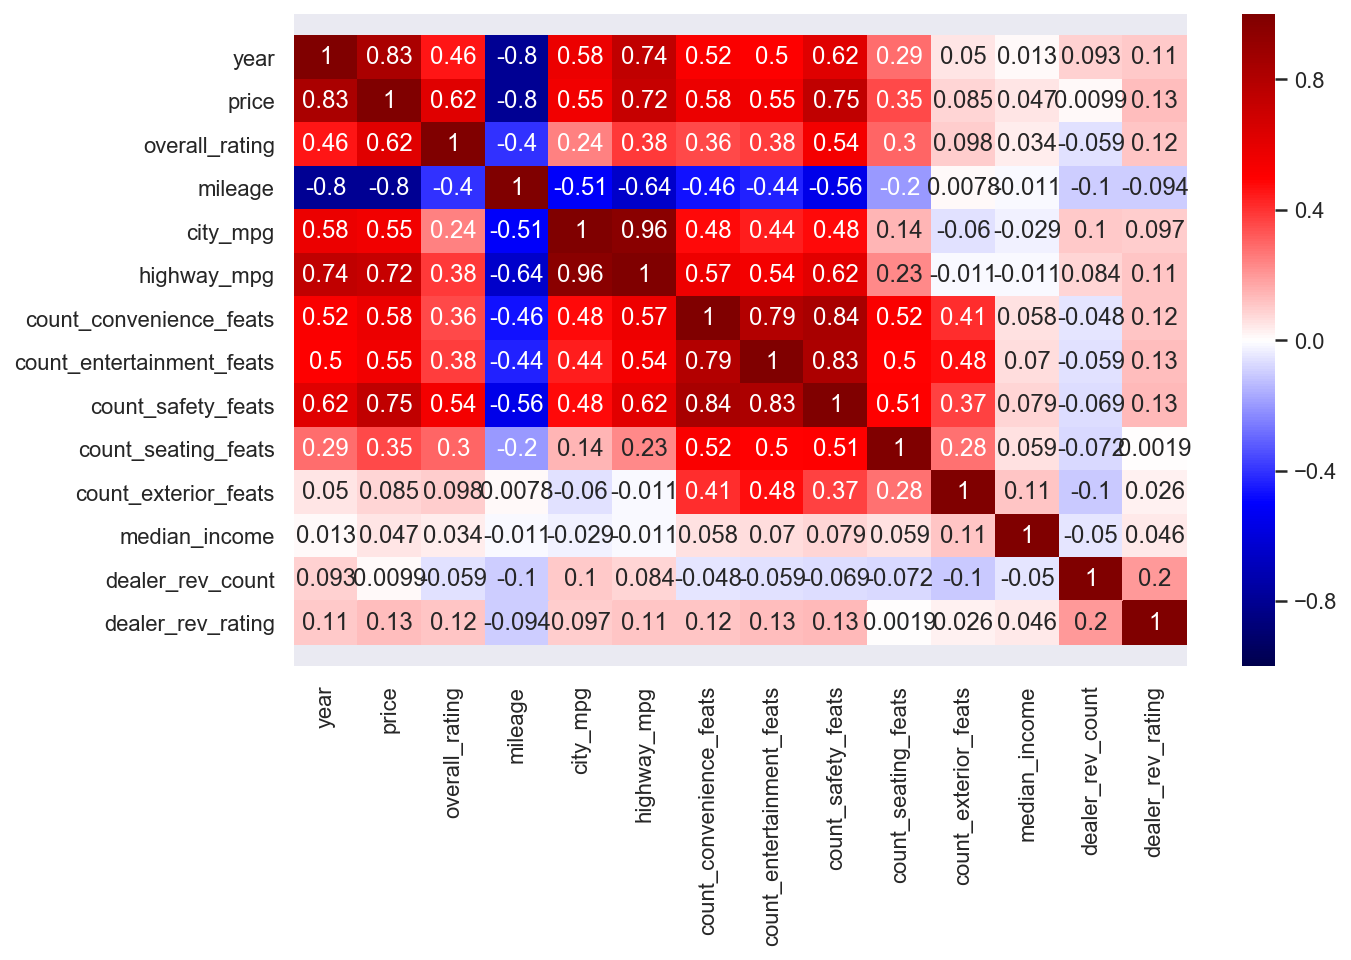

In [358]:
df_select_car.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(df_select_car.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)
plt.gca().set_ylim(len(df_select_car.corr())+0.5, -0.5)


In [402]:
# Features
X = df_select_car.loc[:,['overall_rating', 'mileage', 'city_mpg','highway_mpg','year',
                      #'stock_type', 'model', 
                      #'perf_rating', 'ext_rating', 'int_rating', 'comf_rating','value_rating','reliability_rating',
                      #'ext_color','int_color','engine','general_vin','location',
                      'count_convenience_feats','count_entertainment_feats',
                      'count_safety_feats','count_seating_feats',
                      'count_exterior_feats','median_income',
                      'dealer_rev_count','dealer_rev_rating']]

# Target
y = df_select_car['price']

In [403]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

In [404]:
split_and_validate(X, y)


Validation R^2 score was: 0.873612776789901
Feature coefficient results: 

overall_rating : 7617.03
mileage : -0.09
city_mpg : -2521.74
highway_mpg : 3062.84
year : 198.60
count_convenience_feats : -178.63
count_entertainment_feats : -1206.70
count_safety_feats : 941.78
count_seating_feats : 308.53
count_exterior_feats : -44.28
median_income : 0.00
dealer_rev_count : -0.17
dealer_rev_rating : 69.70


In [390]:
pd.get_dummies(df_select_car['stock_type'],drop_first=True)

,USED
0,1
3,1
4,0
6,1
7,0
...,...
2384,1
2385,1
2386,1
2387,0


In [391]:
# Features
X = df_select_car.loc[:,['overall_rating', 'mileage', 'city_mpg','highway_mpg','year',
                      #'stock_type','model',
                      #'perf_rating', 'ext_rating', 'int_rating', 'comf_rating','value_rating','reliability_rating',
                      #'ext_color','int_color','engine','general_vin','location',
                      'count_convenience_feats','count_entertainment_feats',
                      'count_safety_feats','count_seating_feats',
                      'count_exterior_feats','median_income',
                      'dealer_rev_count','dealer_rev_rating']]

# Target
y = df_select_car['price']

#Cat Model
X[['model1','model2','model3','model4','model5','model6','model7','model8','model9','model10','model11','model12','model13']] = pd.get_dummies(df_select_car['model'],drop_first=True)

#Cat Stock_Type
X[['used']] = pd.get_dummies(df_select_car['stock_type'],drop_first=True)



In [392]:
m = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
m.fit(X_train,y_train)
m.score(X_train,y_train)

0.9342589741087346

In [393]:
m.score(X_test,y_test)

0.9433014287315777

In [394]:
for feature, coef in zip(X.columns, m.coef_):
    print(feature, ':', f'{coef:.2f}') 

overall_rating : 4248.09
mileage : -0.06
city_mpg : -1046.35
highway_mpg : 1231.99
year : 559.79
count_convenience_feats : 317.63
count_entertainment_feats : -572.80
count_safety_feats : 147.77
count_seating_feats : 102.40
count_exterior_feats : -630.42
median_income : 0.01
dealer_rev_count : -0.05
dealer_rev_rating : 8.95
model1 : -3470.71
model2 : -4181.14
model3 : -4607.91
model4 : -1979.71
model5 : -0.00
model6 : -1369.00
model7 : -1416.04
model8 : -1657.22
model9 : 682.40
model10 : -4362.64
model11 : -5920.62
model12 : -4933.81
model13 : 0.00
used : -5349.25


In [395]:
#Regular Polynomial
m = LinearRegression()
p = PolynomialFeatures(degree=2)
m.fit(p.fit_transform(X_train),y_train)
m.score(p.transform(X_train),y_train)

0.9645843779489738

In [396]:
m.score(p.transform(X_test),y_test)

0.9207519734063384

In [397]:
p.get_feature_names(),m.coef_

(['1',
  'x0',
  'x1',
  'x2',
  'x3',
  'x4',
  'x5',
  'x6',
  'x7',
  'x8',
  'x9',
  'x10',
  'x11',
  'x12',
  'x13',
  'x14',
  'x15',
  'x16',
  'x17',
  'x18',
  'x19',
  'x20',
  'x21',
  'x22',
  'x23',
  'x24',
  'x25',
  'x26',
  'x0^2',
  'x0 x1',
  'x0 x2',
  'x0 x3',
  'x0 x4',
  'x0 x5',
  'x0 x6',
  'x0 x7',
  'x0 x8',
  'x0 x9',
  'x0 x10',
  'x0 x11',
  'x0 x12',
  'x0 x13',
  'x0 x14',
  'x0 x15',
  'x0 x16',
  'x0 x17',
  'x0 x18',
  'x0 x19',
  'x0 x20',
  'x0 x21',
  'x0 x22',
  'x0 x23',
  'x0 x24',
  'x0 x25',
  'x0 x26',
  'x1^2',
  'x1 x2',
  'x1 x3',
  'x1 x4',
  'x1 x5',
  'x1 x6',
  'x1 x7',
  'x1 x8',
  'x1 x9',
  'x1 x10',
  'x1 x11',
  'x1 x12',
  'x1 x13',
  'x1 x14',
  'x1 x15',
  'x1 x16',
  'x1 x17',
  'x1 x18',
  'x1 x19',
  'x1 x20',
  'x1 x21',
  'x1 x22',
  'x1 x23',
  'x1 x24',
  'x1 x25',
  'x1 x26',
  'x2^2',
  'x2 x3',
  'x2 x4',
  'x2 x5',
  'x2 x6',
  'x2 x7',
  'x2 x8',
  'x2 x9',
  'x2 x10',
  'x2 x11',
  'x2 x12',
  'x2 x13',
  'x2 x14'

In [398]:
#Lasso
m = LassoCV()
p = PolynomialFeatures(degree=2)
m.fit(p.fit_transform(X_train),y_train)
m.score(p.transform(X_train),y_train)

/Users/chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7427534303731185

In [399]:
m.score(p.transform(X_test),y_test)

0.7330348534526855

In [400]:
#Ridge
m = RidgeCV()
p = PolynomialFeatures(degree=2)
m.fit(p.fit_transform(X_train),y_train)
m.score(p.transform(X_train),y_train)

-5393730704149.371

In [401]:
m.score(p.transform(X_test),y_test)

-6201591057002.006

In [ ]:
page = requests.get('https://www.cars.com/vehicledetail/detail/792320587/overview/', user_agent).text
soup = BeautifulSoup(page, 'html5lib')
#(soup.find(class_ = 'vehicle-info__price-label vehicle-info__price-label--msrp-badge').findNext().text).translate(str.maketrans('', '', string.punctuation))
#car_data
#car_dets


In [ ]:
df_car_data.sort_values(['year_model'],ascending=False)

In [ ]:
   elif soup.find('p', text = re.compile(r"JM1N[A-Za-z0-9]{13}")):

        
vin = re.search(r"JM1N[A-Za-z0-9]{13}", soup.find('p', text = re.compile(r"JM1N[A-Za-z0-9]{13}")).text).group(0)
 

In [ ]:
2

import re
soup.findAll('a', text = re.compile("Fetch"))

In [ ]:
#soup.find(class_='page-section__title--sub cui-heading-2', text='Convenience').findNext().text


#New Car: https://www.cars.com/vehicledetail/detail/767132829/overview/


#Dealership Review Count
if soup.find(class_="rating__link--has-reviews-count"):
    dealer_rev_count = re.search(r"^[0-9]+",soup.find(class_="rating__link--has-reviews-count").text).group()
else:
    dealer_rev_count = None
print(dealer_rev_count)
#Dealership Review Rating
if soup.find(class_="rating__link rating__link--has-reviews"):
    dealer_rev_rating = re.search(r"(\()([0-9.]+)(\))",soup.find(class_="rating__link rating__link--has-reviews").text).group(2)
else:
    dealer_rev_rating = None
print(dealer_rev_rating)

In [25]:
pd.set_option("display.max_rows", 999)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)